<a href="https://colab.research.google.com/github/khalid-data-aspirant42/Used-Car-Price-Prediction/blob/main/CarDekho_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project2:Supervised_Learning/Car dekho dataset/car_data.csv')

In [4]:
df3 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project2:Supervised_Learning/Car dekho dataset/Car_detailsv3.csv')

In [5]:
df1.shape

(301, 9)

In [6]:
df3.shape

(8128, 13)

In [7]:
df1.iloc[0,:]

Car_Name           ritz
Year               2014
Selling_Price      3.35
Present_Price      5.59
Kms_Driven        27000
Fuel_Type        Petrol
Seller_Type      Dealer
Transmission     Manual
Owner                 0
Name: 0, dtype: object

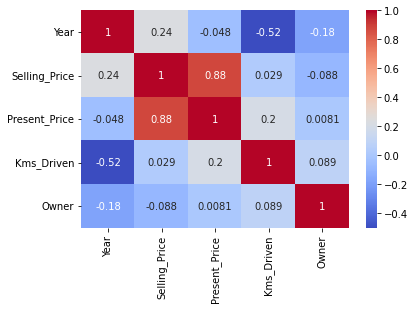

In [8]:
sb.heatmap(df1.corr(), vmin=-0.5, cmap='coolwarm', annot=True)

In [9]:
numerical_features = list(df1.describe().columns)
print(numerical_features)

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


In [10]:
categorical_features = []
for col in df1.columns:
    if col not in numerical_features:
        categorical_features.append(col)
print(categorical_features)    

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


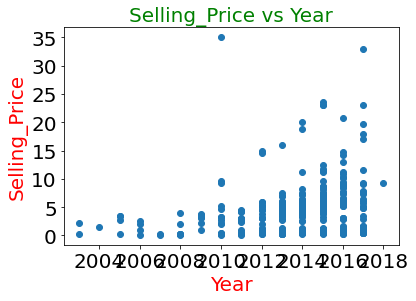

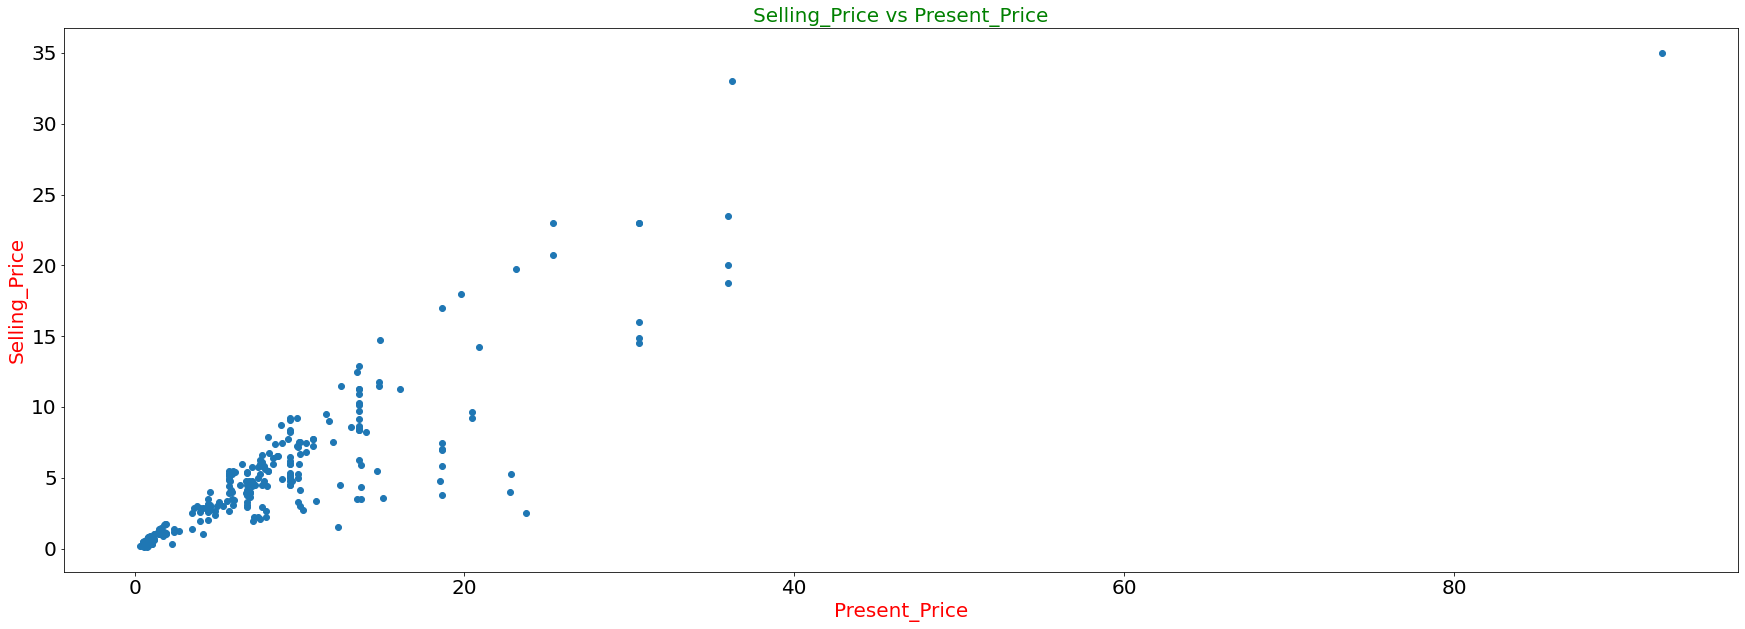

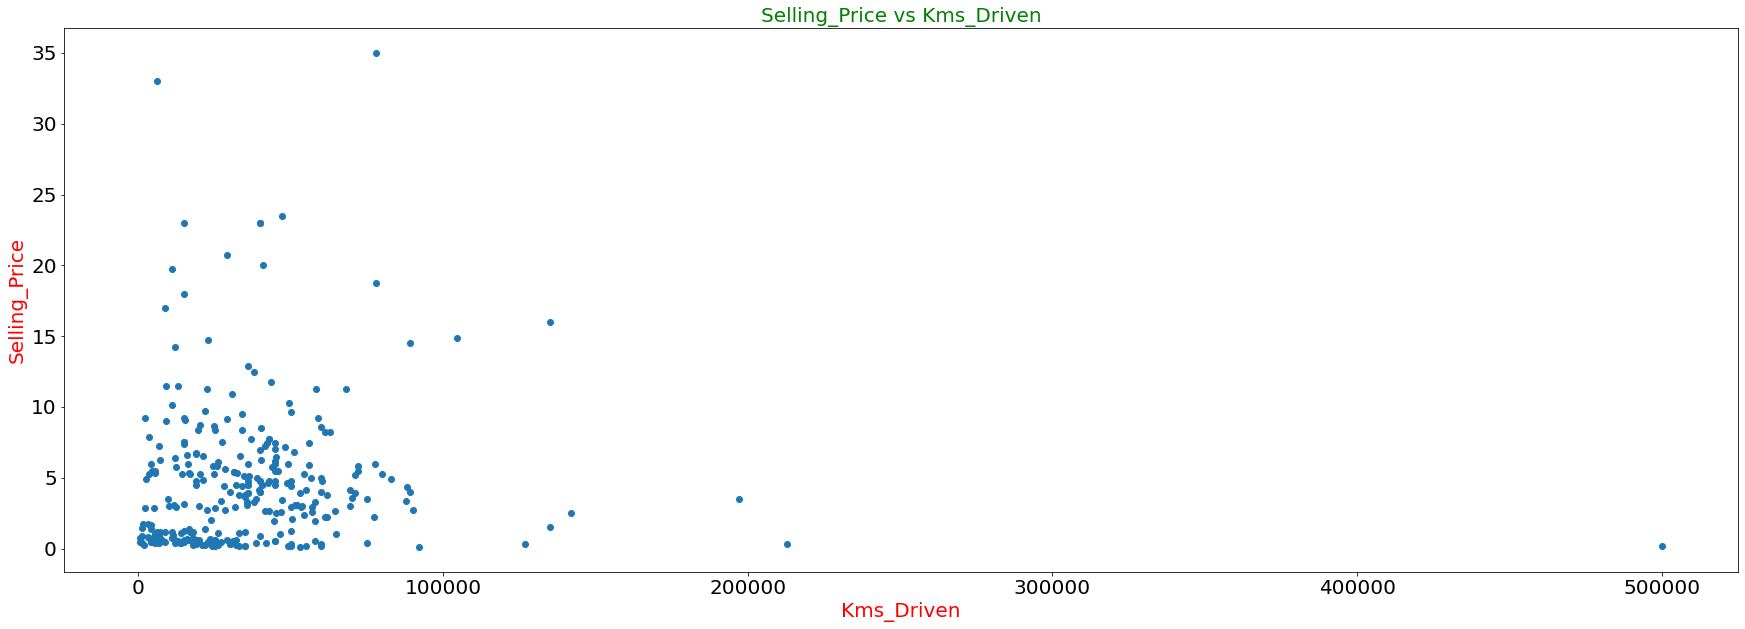

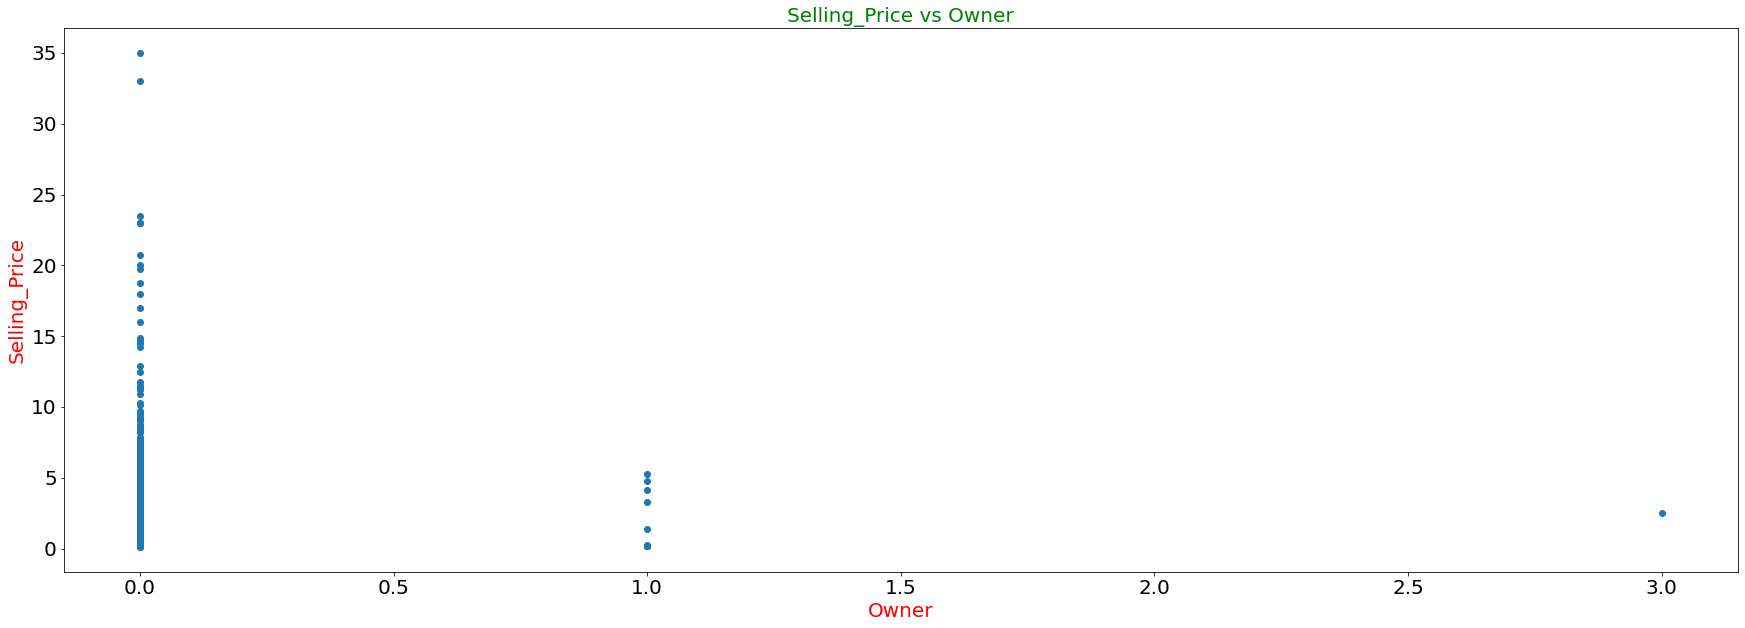

In [11]:
# Ploting scatter graph  for dependent and independent variables
for elem in numerical_features:
    if elem!='Selling_Price':
        x = df1[elem]
        y = df1['Selling_Price']
        plt.scatter(x,y)
        plt.title(f'Selling_Price vs {elem}', fontsize=20, color='green')
        plt.ylabel('Selling_Price', fontsize=20, color='red')
        plt.xlabel(elem, fontsize=20, color='red')
        plt.yticks(fontsize=20)
        plt.xticks(fontsize=20)
        plt.rcParams['figure.figsize'] = (30, 10)
        plt.show()

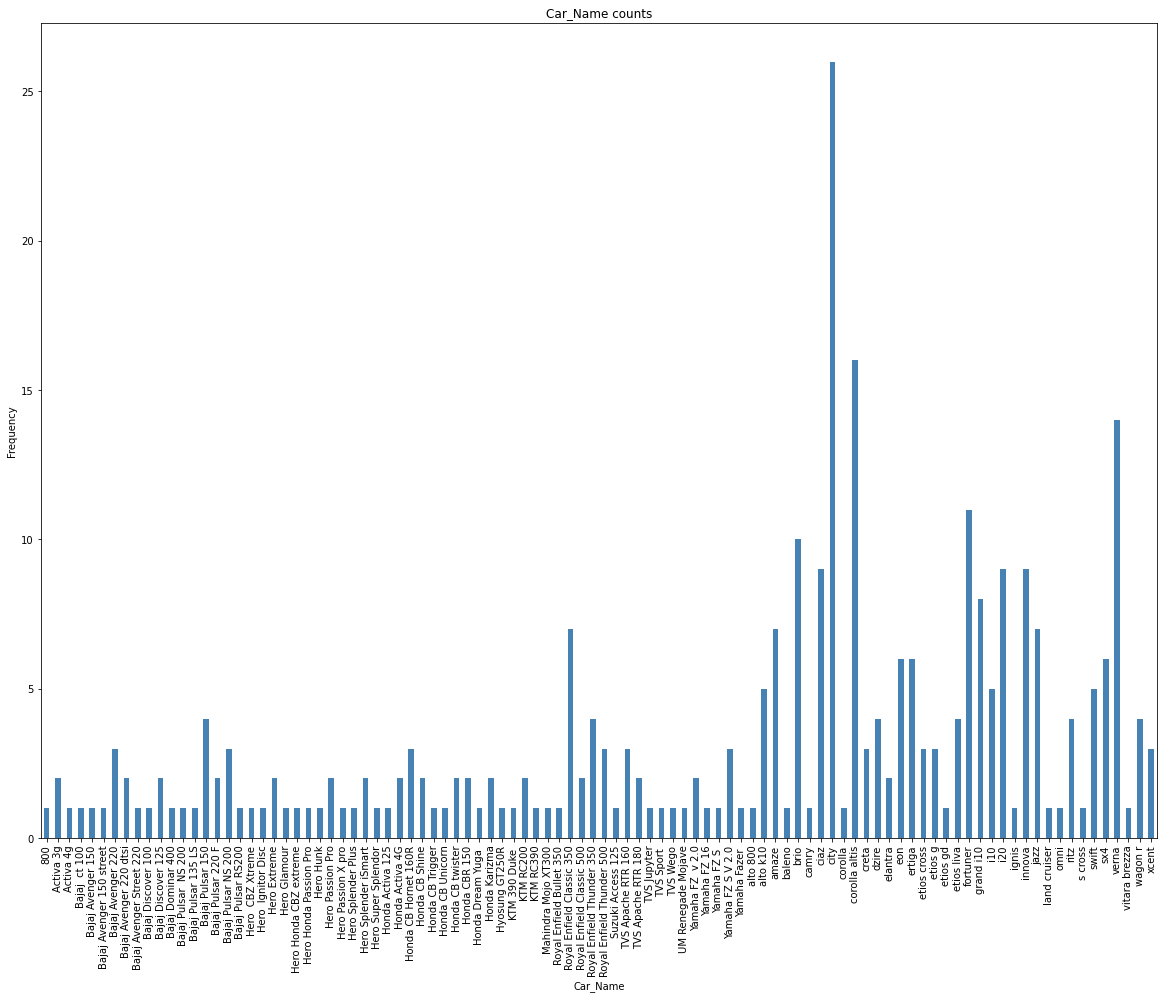

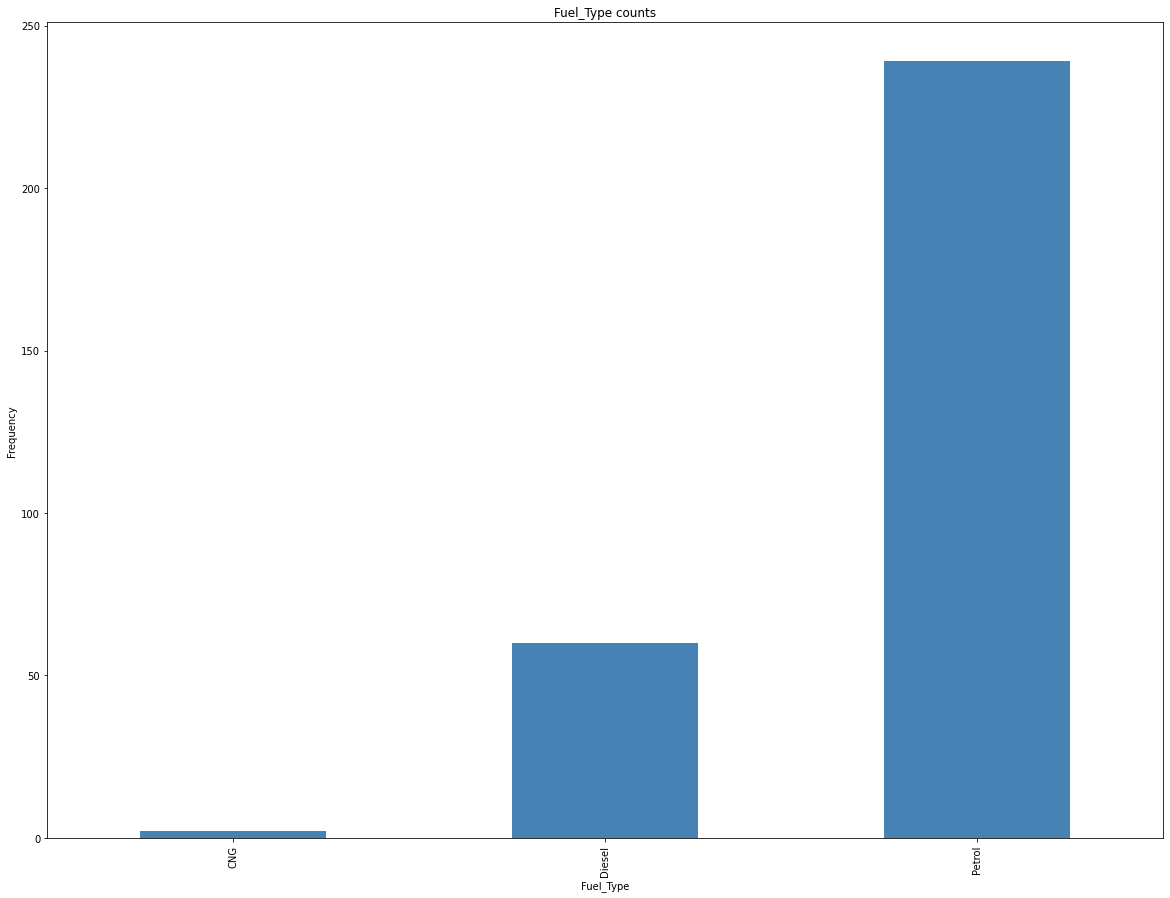

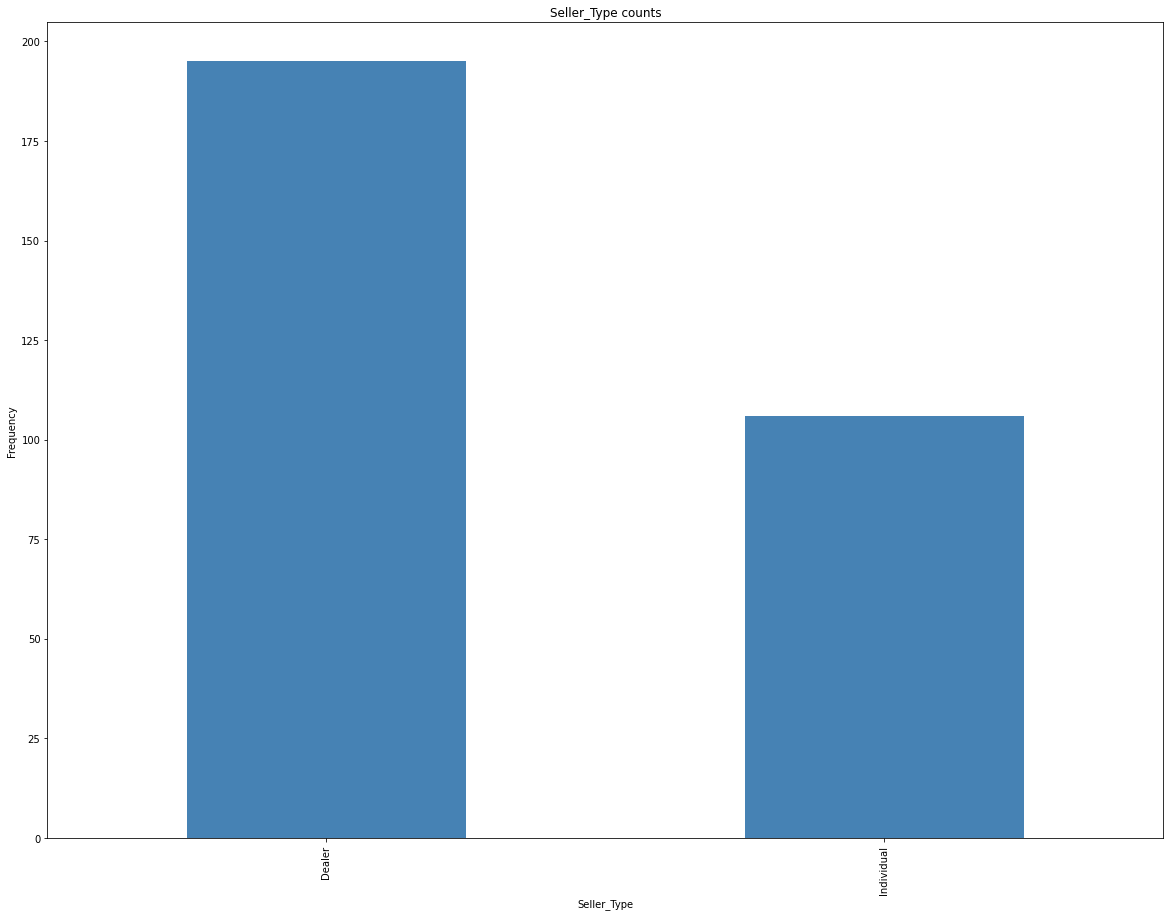

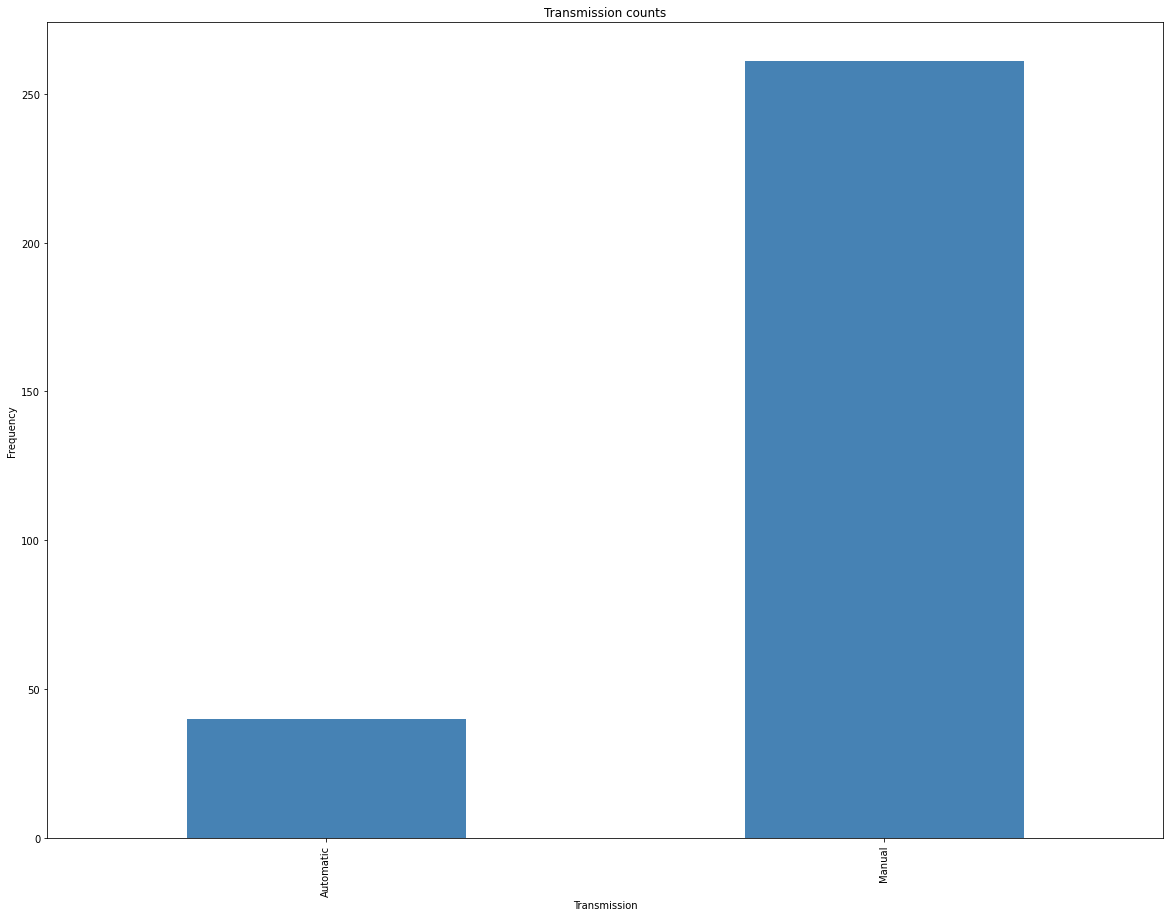

In [12]:

for col in categorical_features:
    counts1 = df1[col].value_counts().sort_index()
    fig = plt.figure(figsize=(20, 15))
    ax = fig.gca()
    counts1.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
    plt.show()

In [13]:
df3.iloc[0,:]

name             Maruti Swift Dzire VDI
year                               2014
selling_price                    450000
km_driven                        145500
fuel                             Diesel
seller_type                  Individual
transmission                     Manual
owner                       First Owner
mileage                       23.4 kmpl
engine                          1248 CC
max_power                        74 bhp
torque                   190Nm@ 2000rpm
seats                               5.0
Name: 0, dtype: object

In [14]:
df3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [15]:
df3.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [17]:
df3.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [18]:
df3.corr()

,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,-0.009144
selling_price,0.414092,1.000000,-0.225534,0.041358
km_driven,-0.418006,-0.225534,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


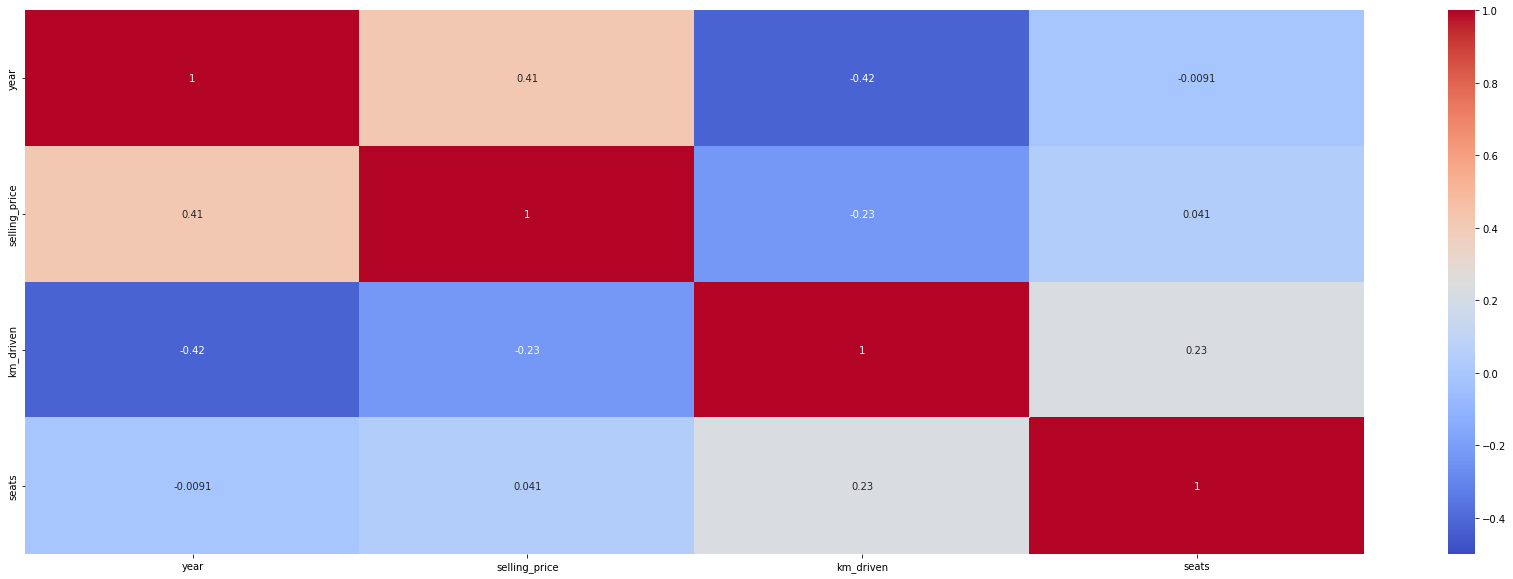

In [19]:
sb.heatmap(df3.corr(), vmin=-0.5, cmap='coolwarm', annot=True)

In [20]:
numerical_features = list(df3.describe().columns)
print(numerical_features)

['year', 'selling_price', 'km_driven', 'seats']


In [21]:
categorical_features = []
for col in df3.columns:
    if col not in numerical_features:
        categorical_features.append(col)
print(categorical_features)    

['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']


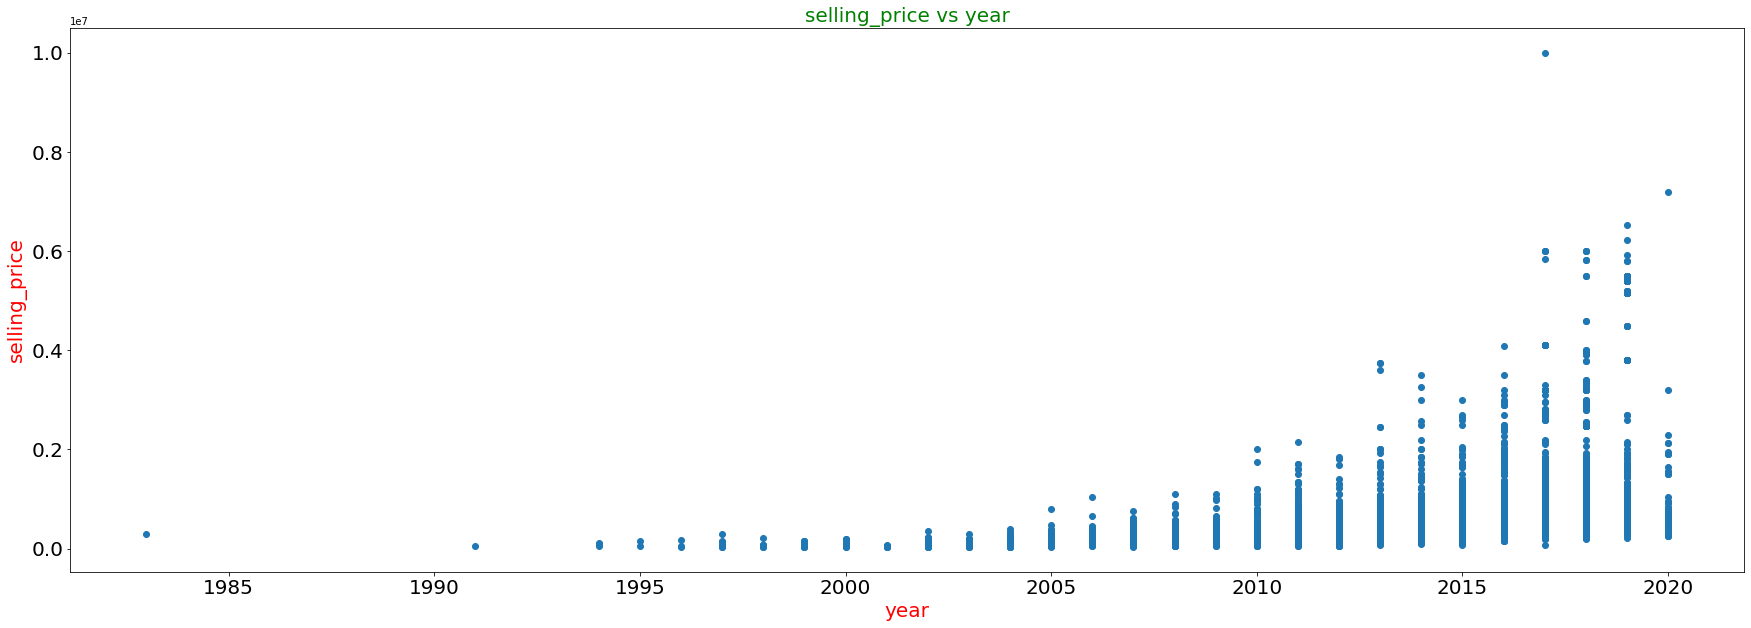

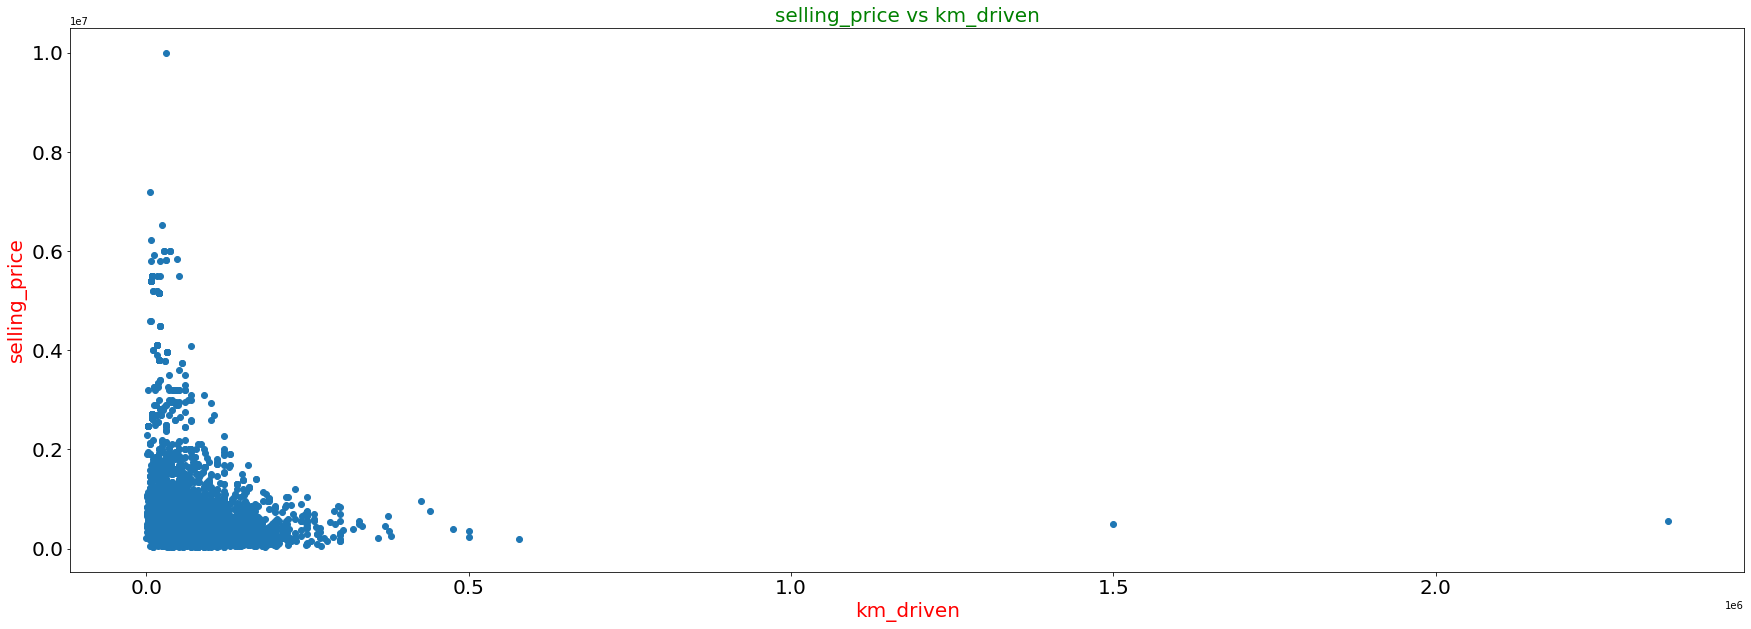

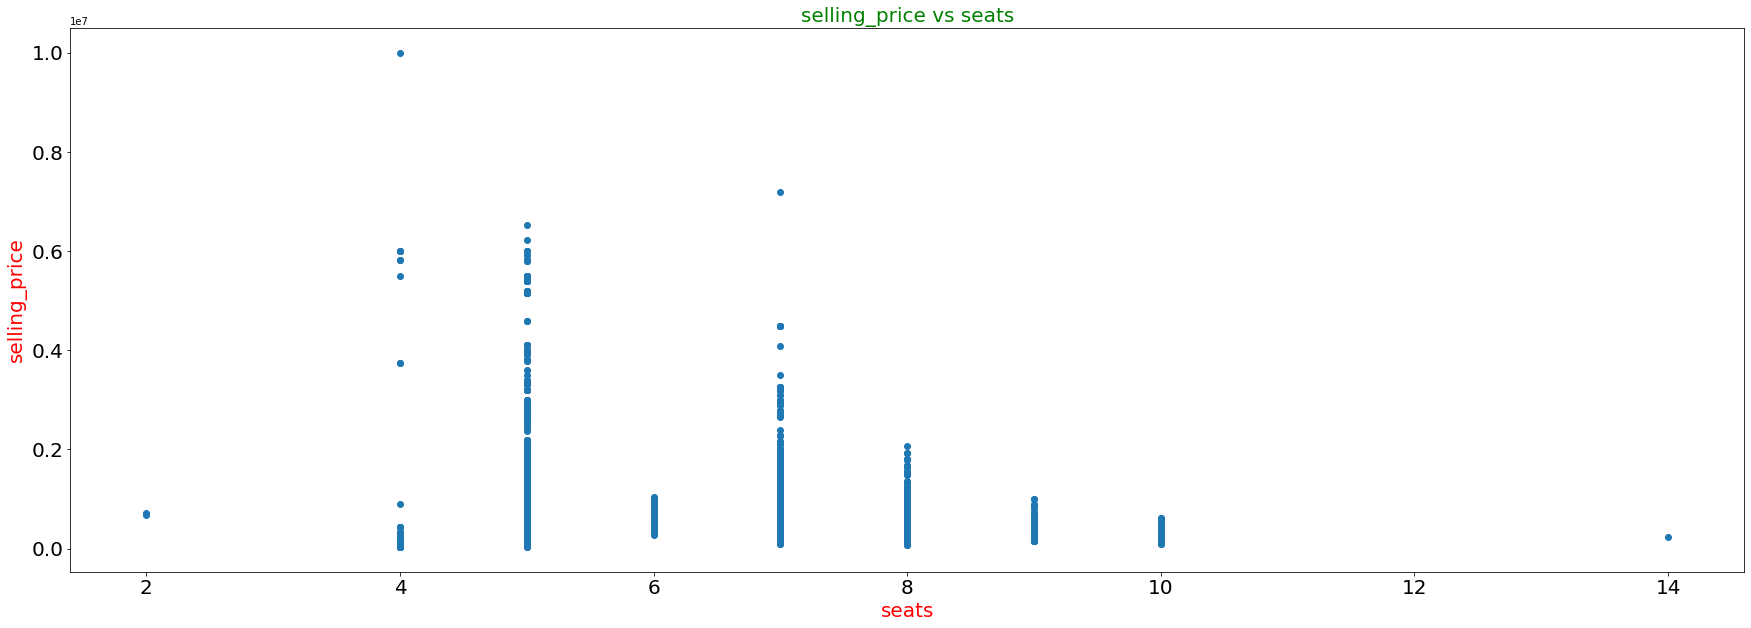

In [22]:
# Ploting scatter graph  for dependent and independent variables
for elem in numerical_features:
    if elem!='selling_price':
        x = df3[elem]
        y = df3['selling_price']
        plt.scatter(x,y)
        plt.title(f'selling_price vs {elem}', fontsize=20, color='green')
        plt.ylabel('selling_price', fontsize=20, color='red')
        plt.xlabel(elem, fontsize=20, color='red')
        plt.yticks(fontsize=20)
        plt.xticks(fontsize=20)
        plt.rcParams['figure.figsize'] = (30, 10)
        plt.show()

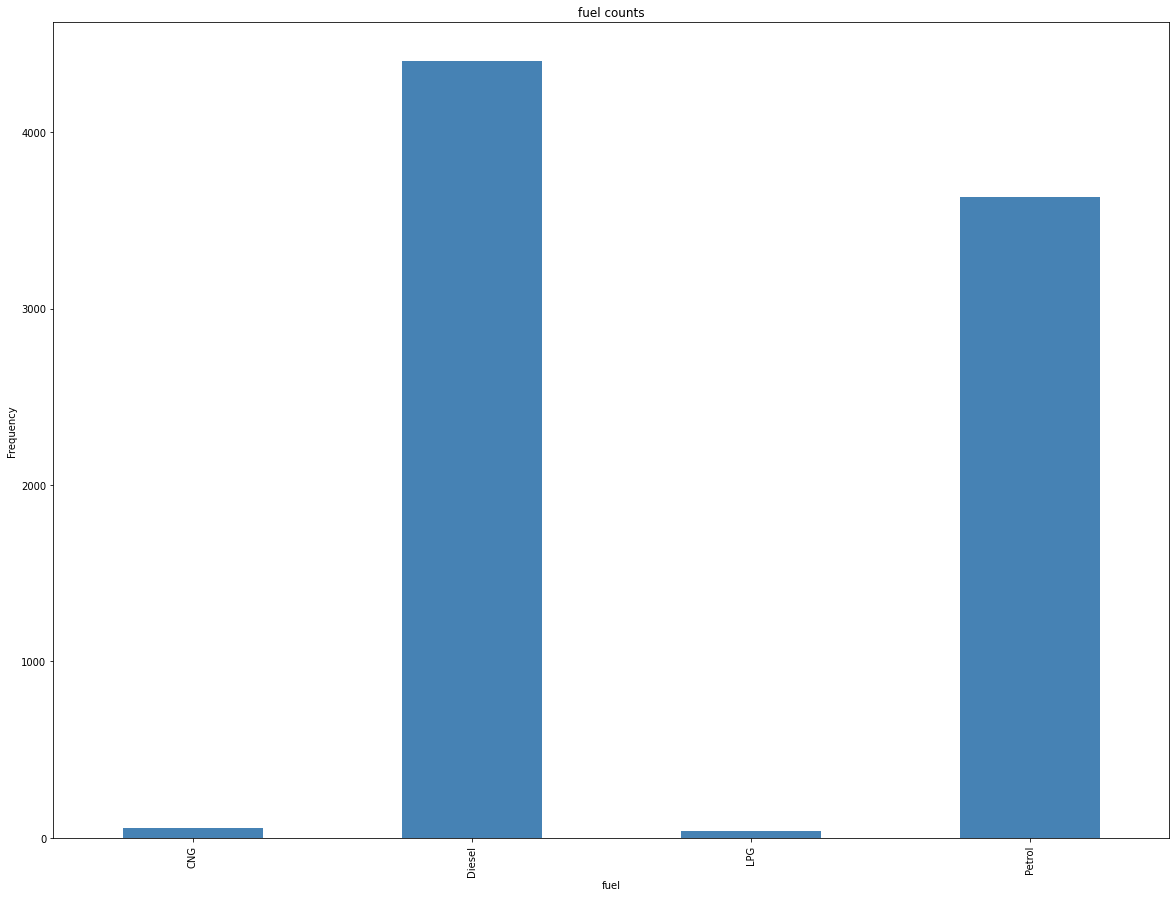

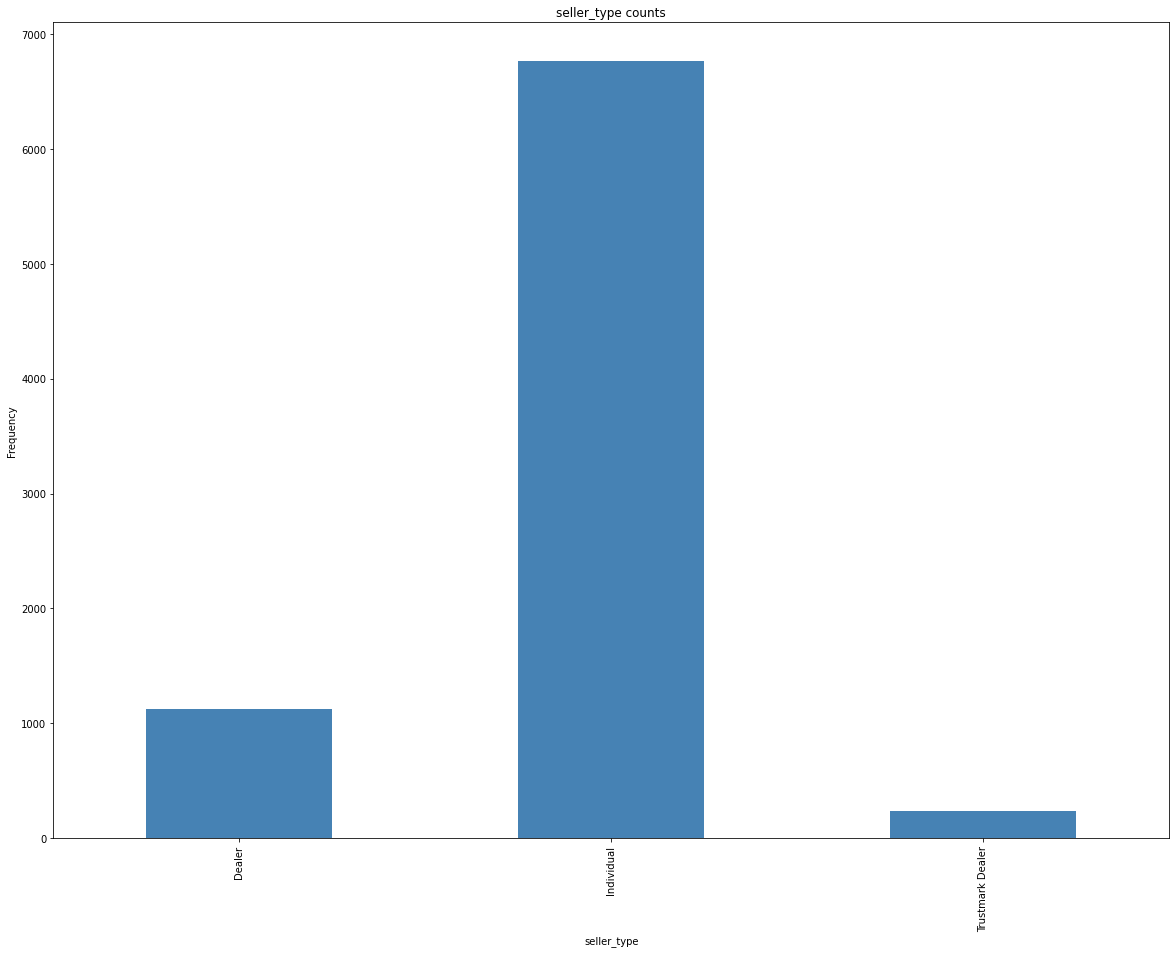

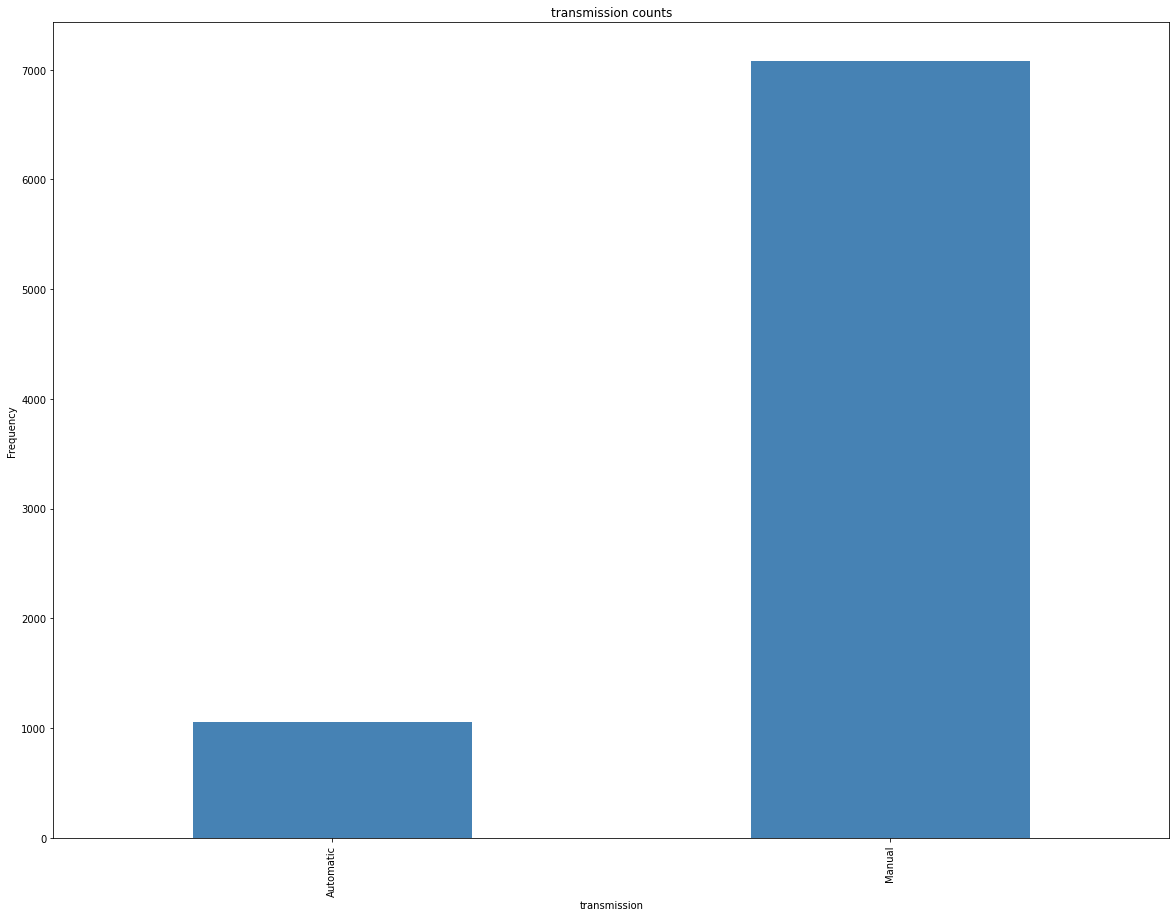

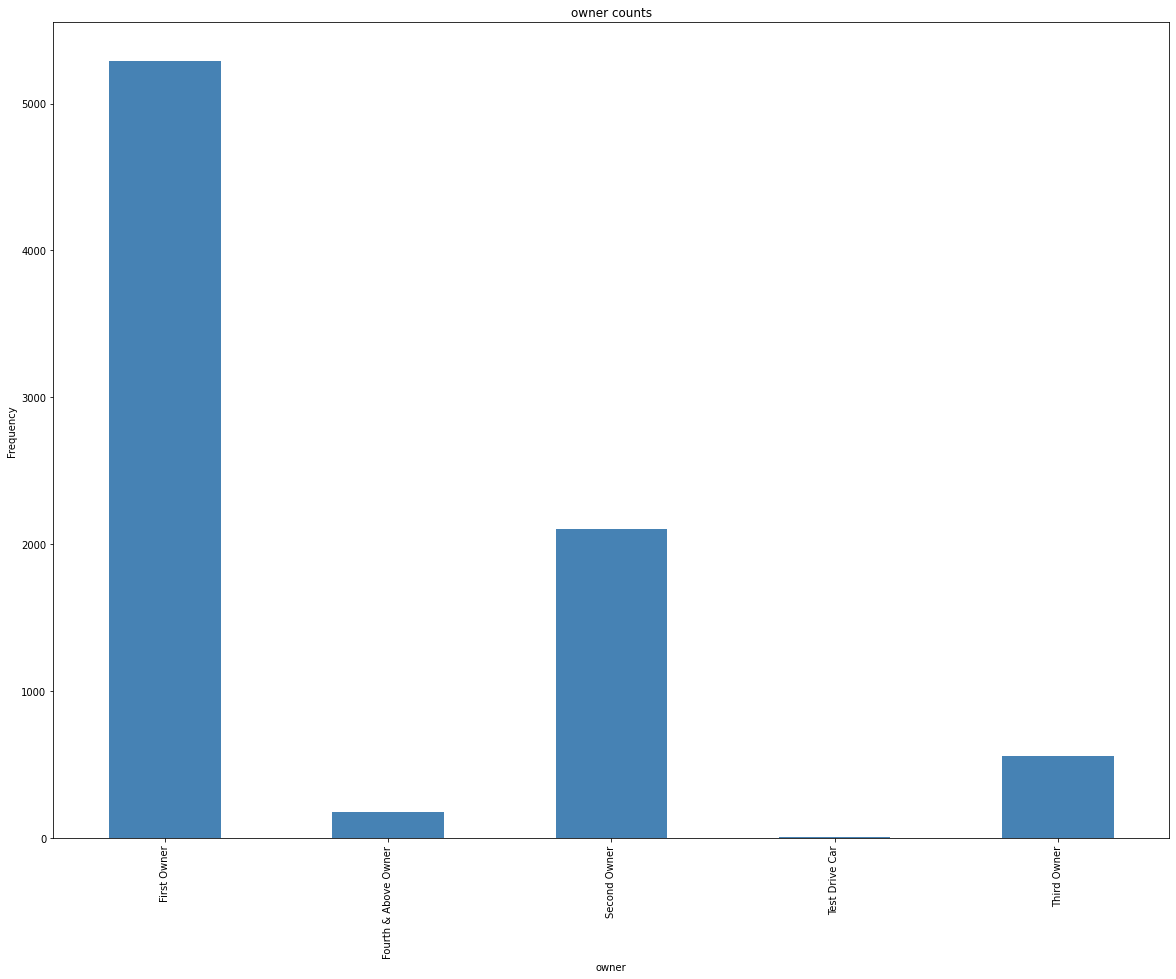

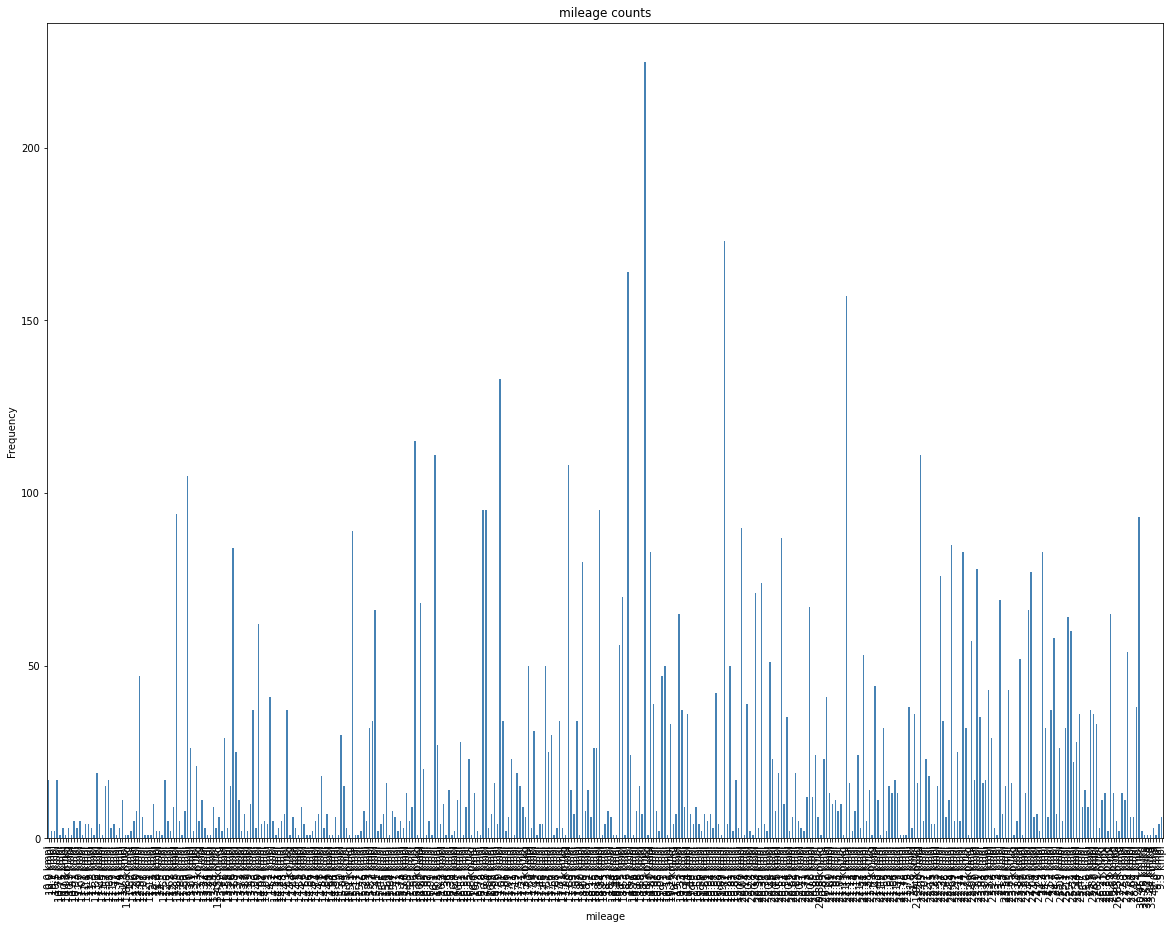

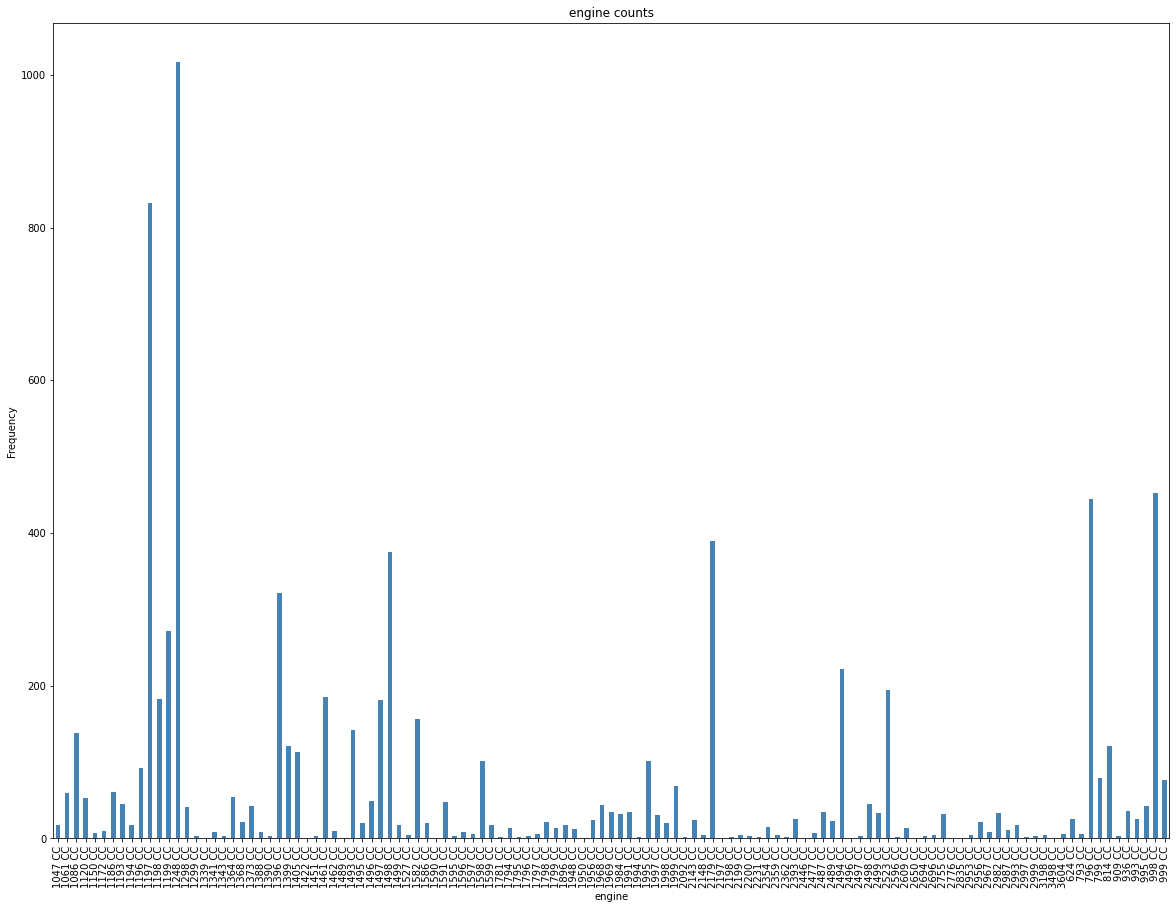

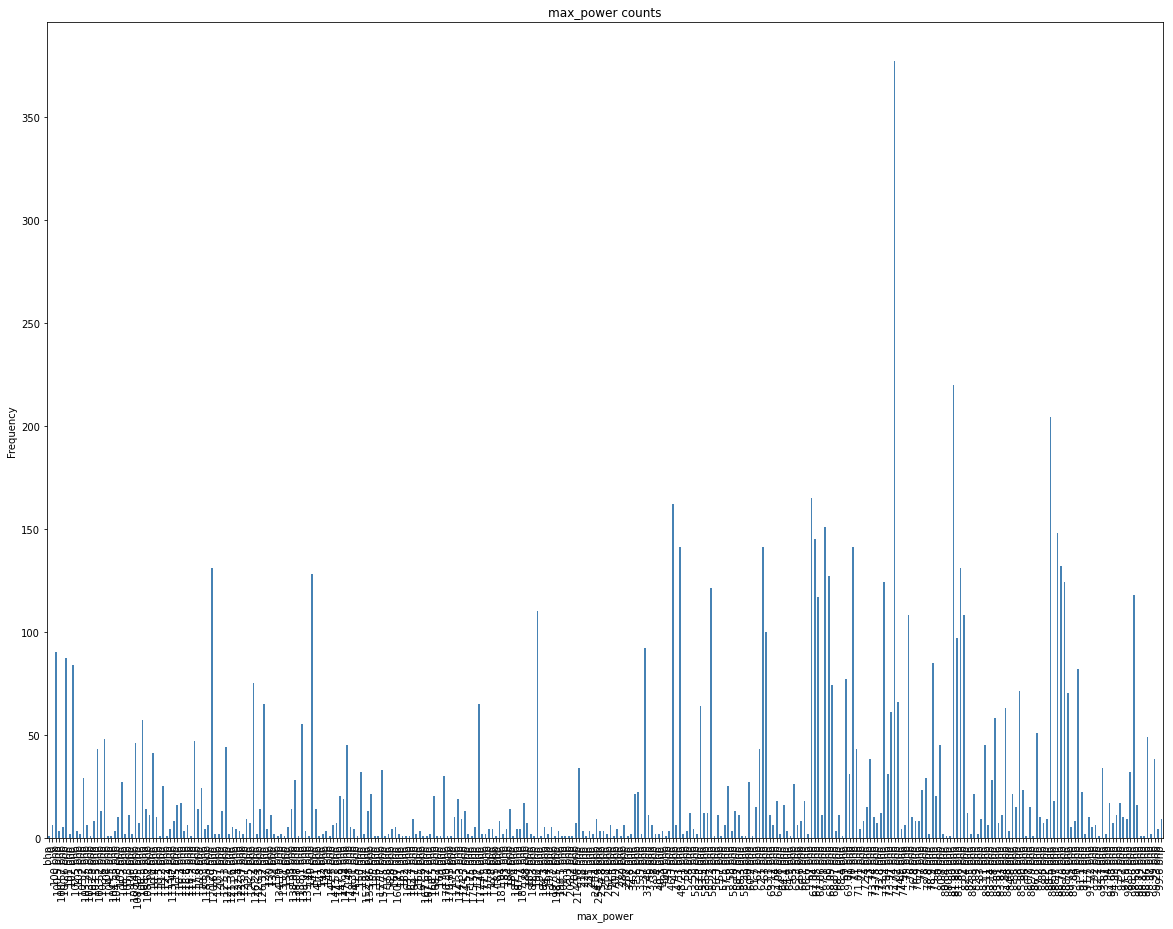

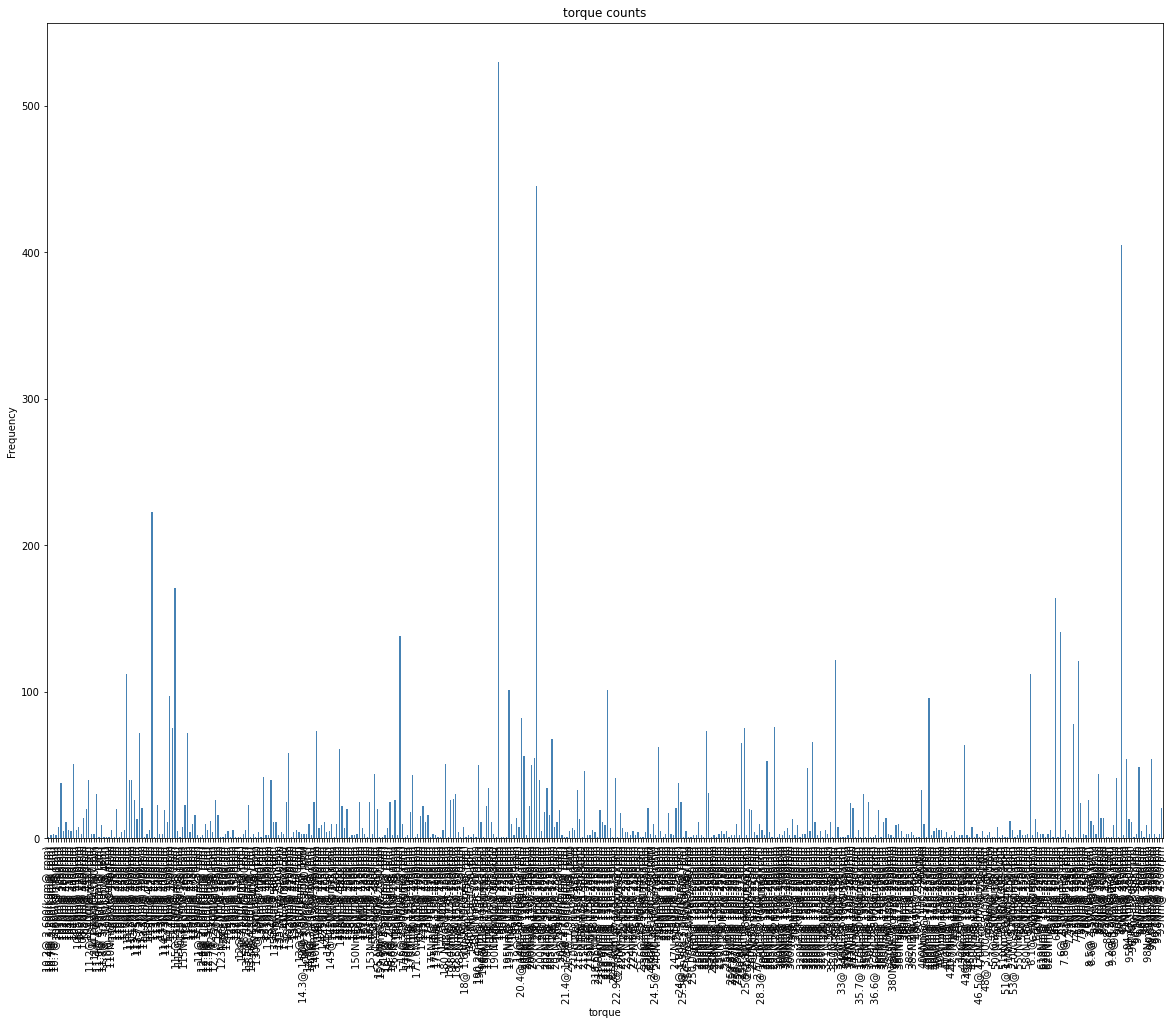

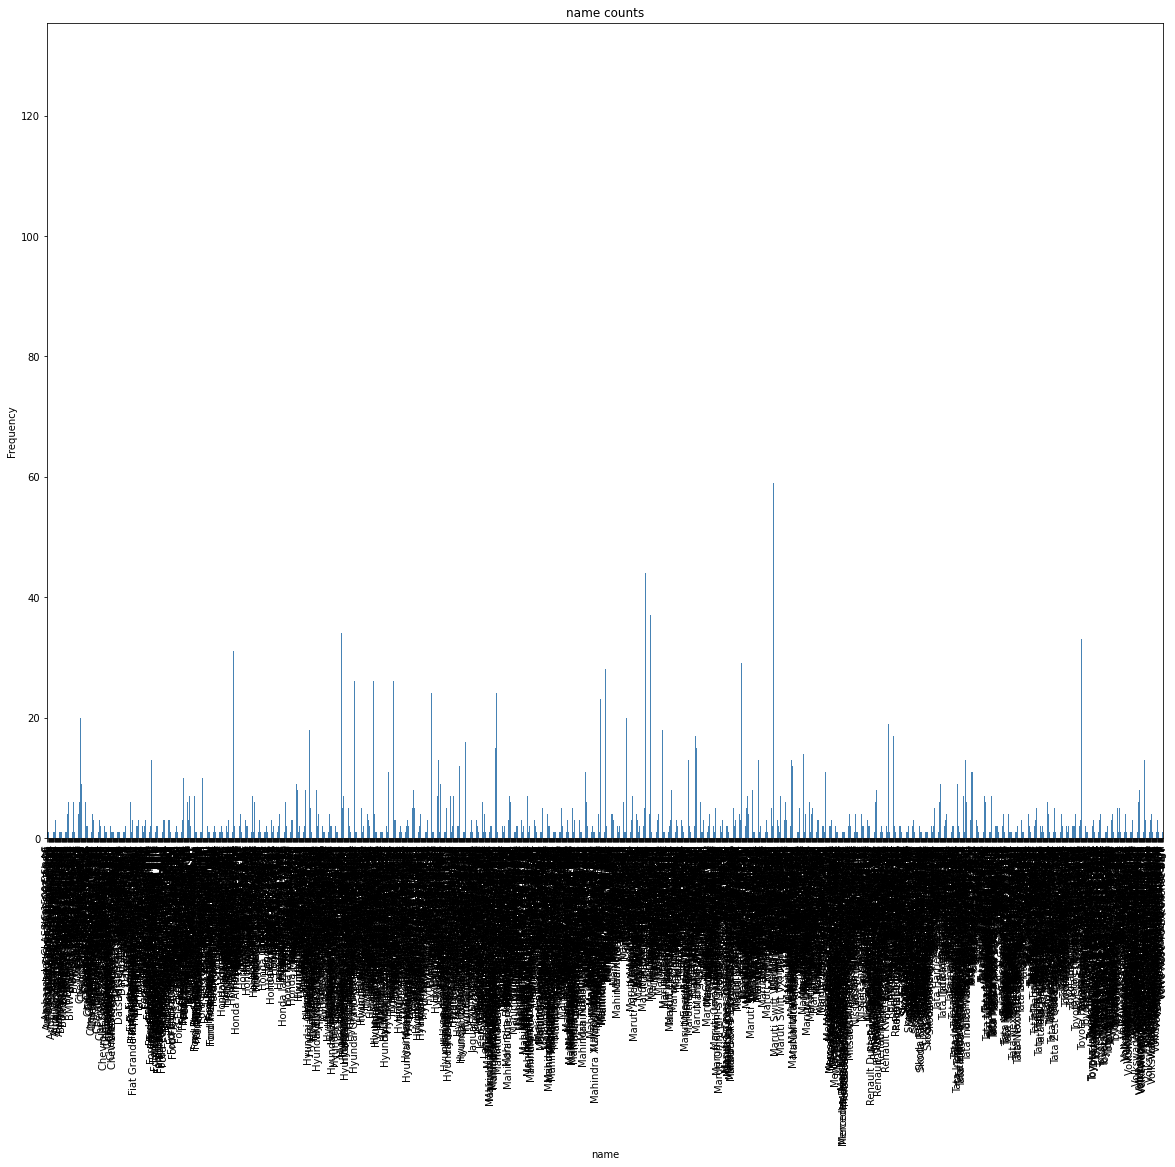

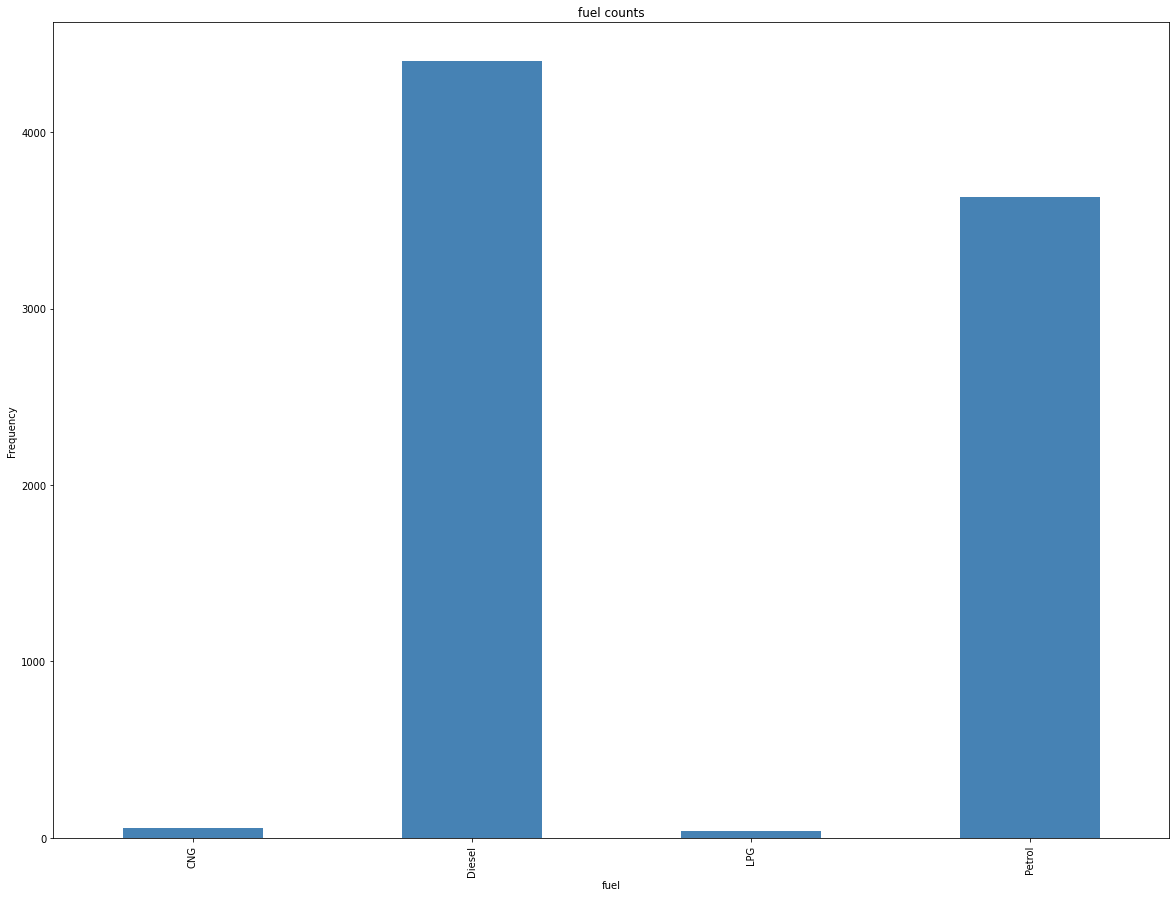

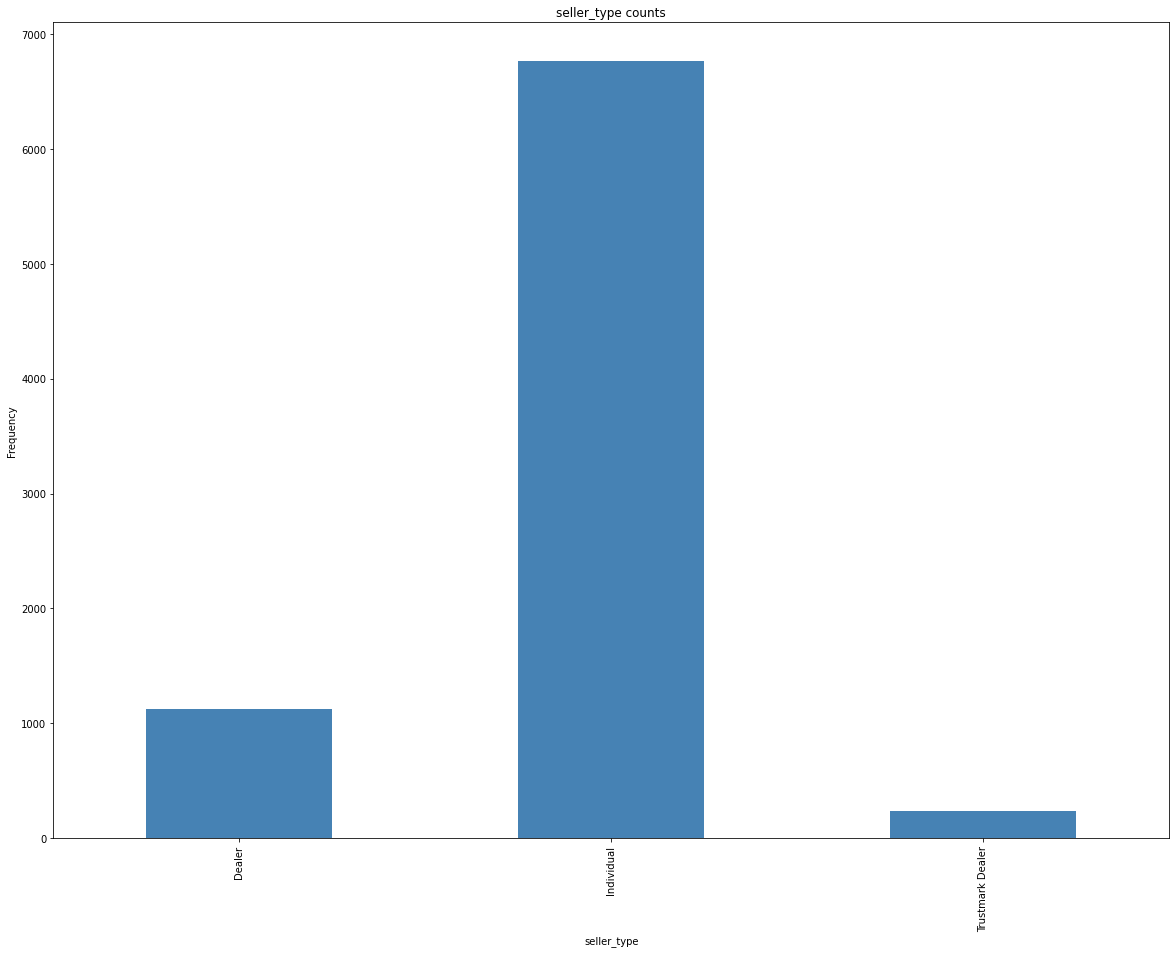

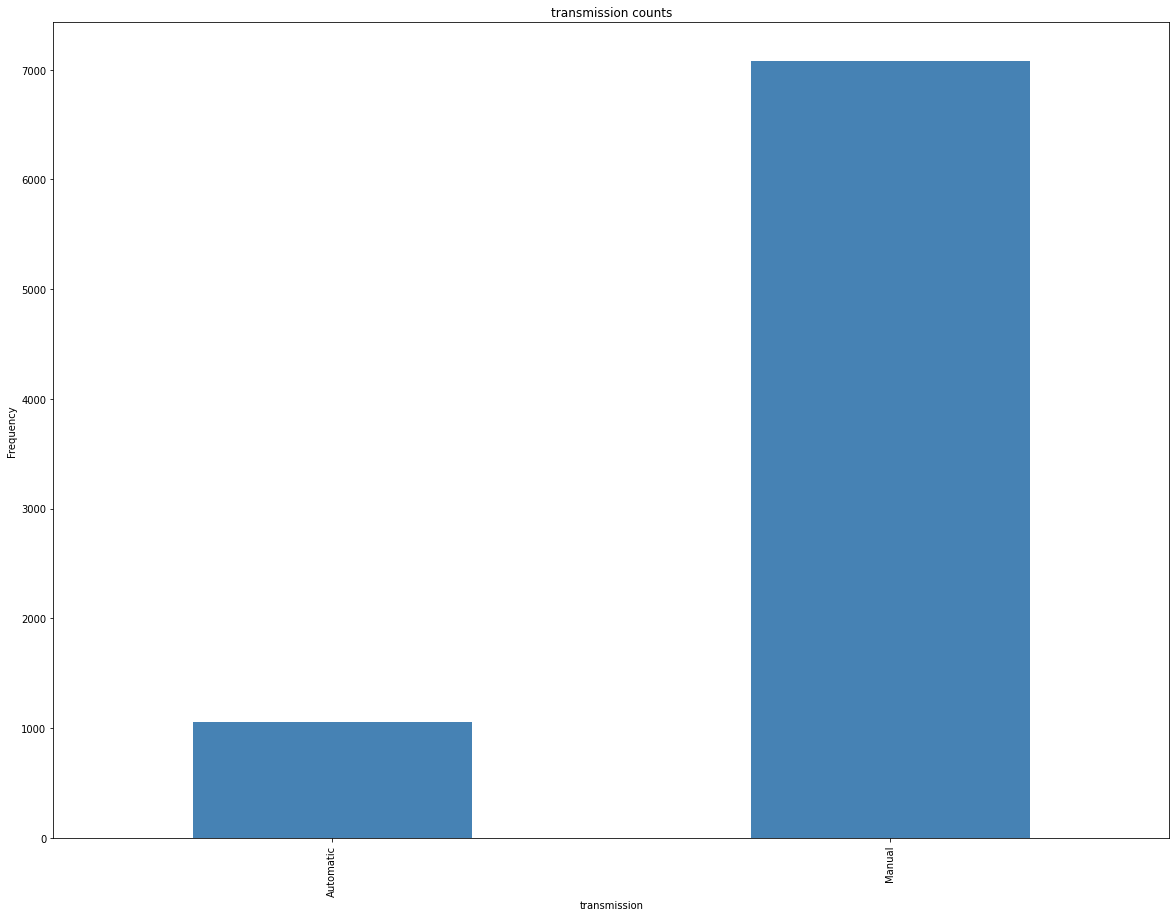

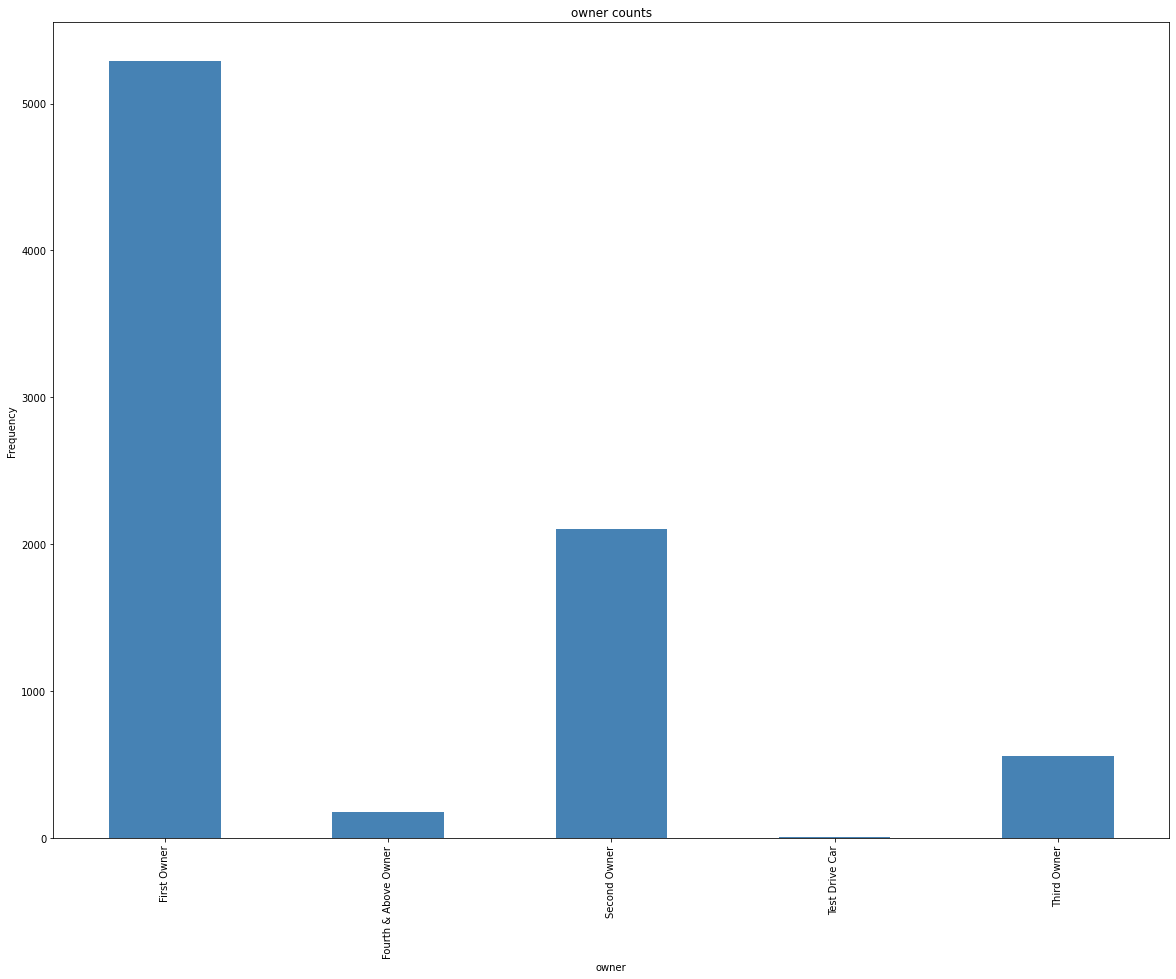

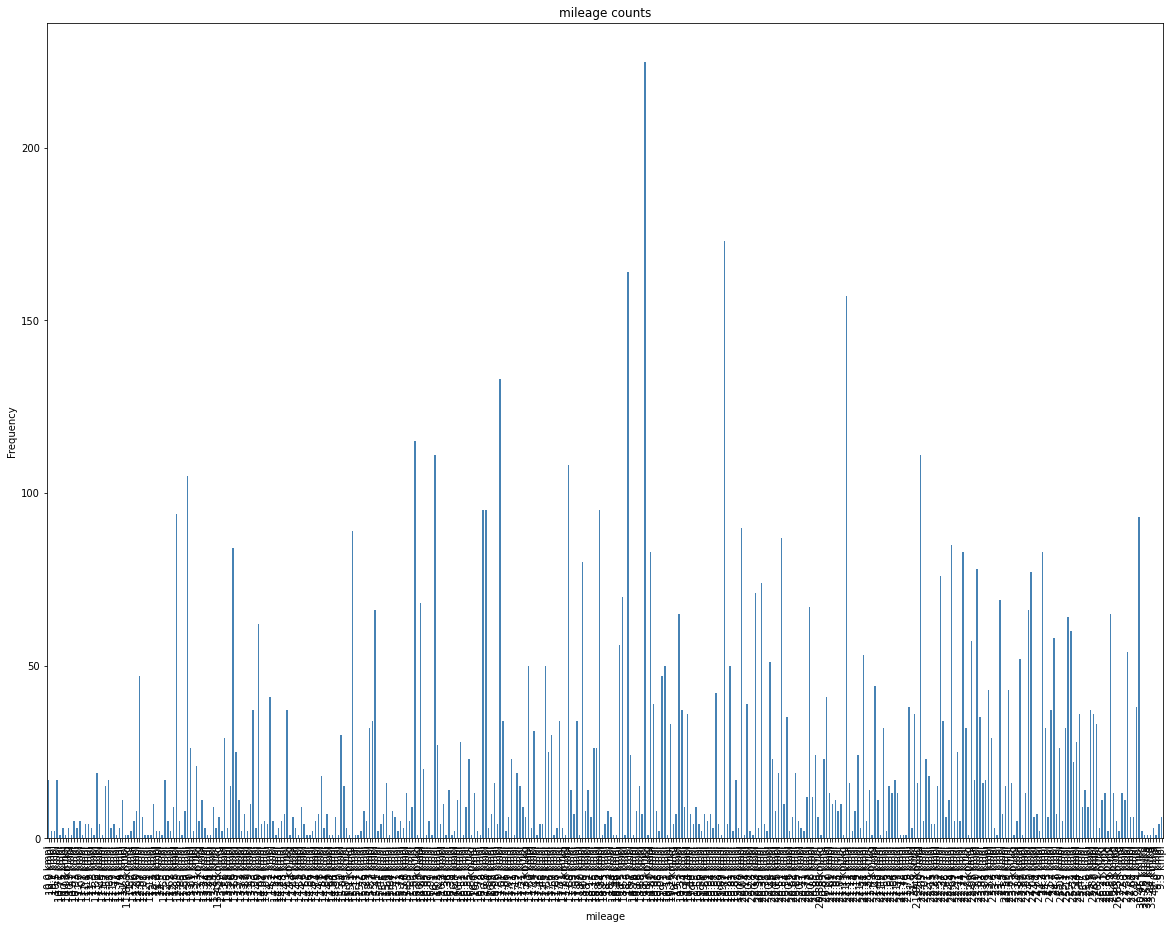

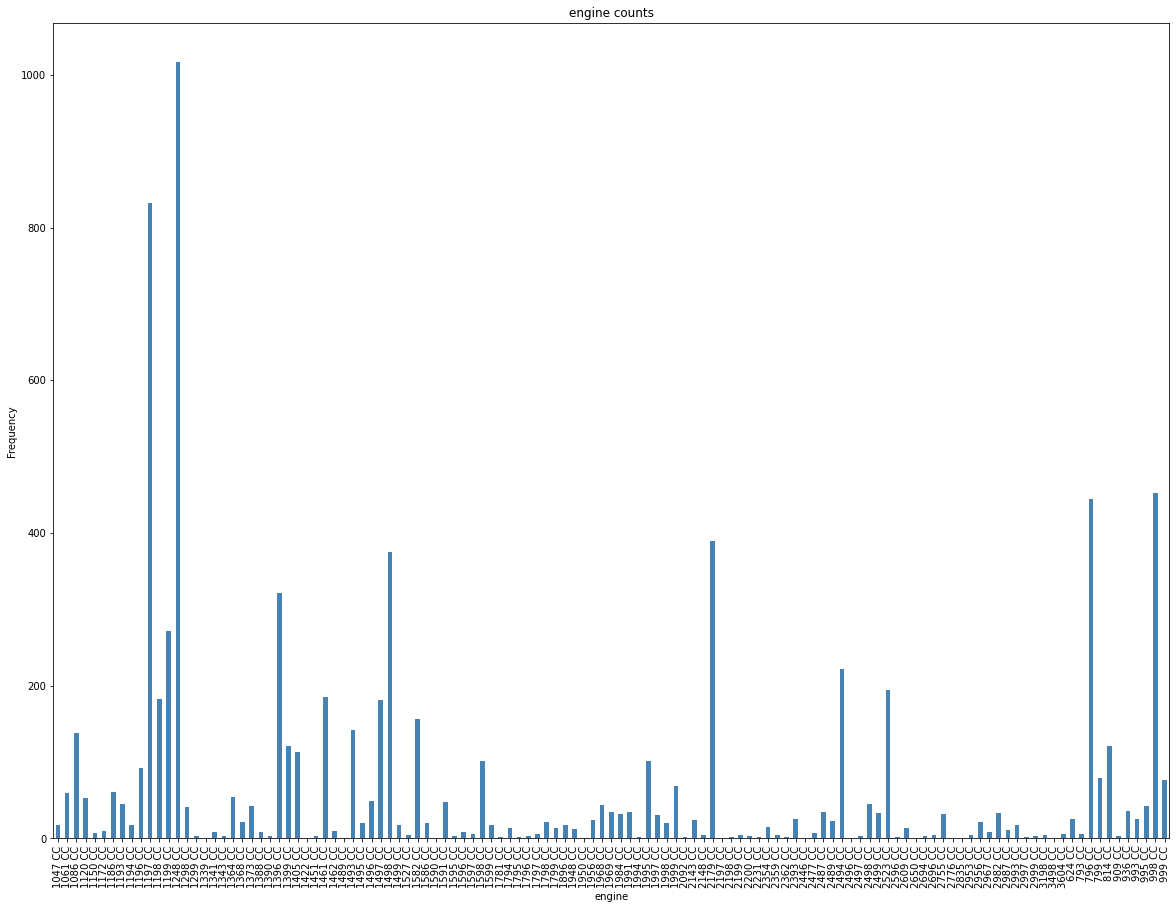

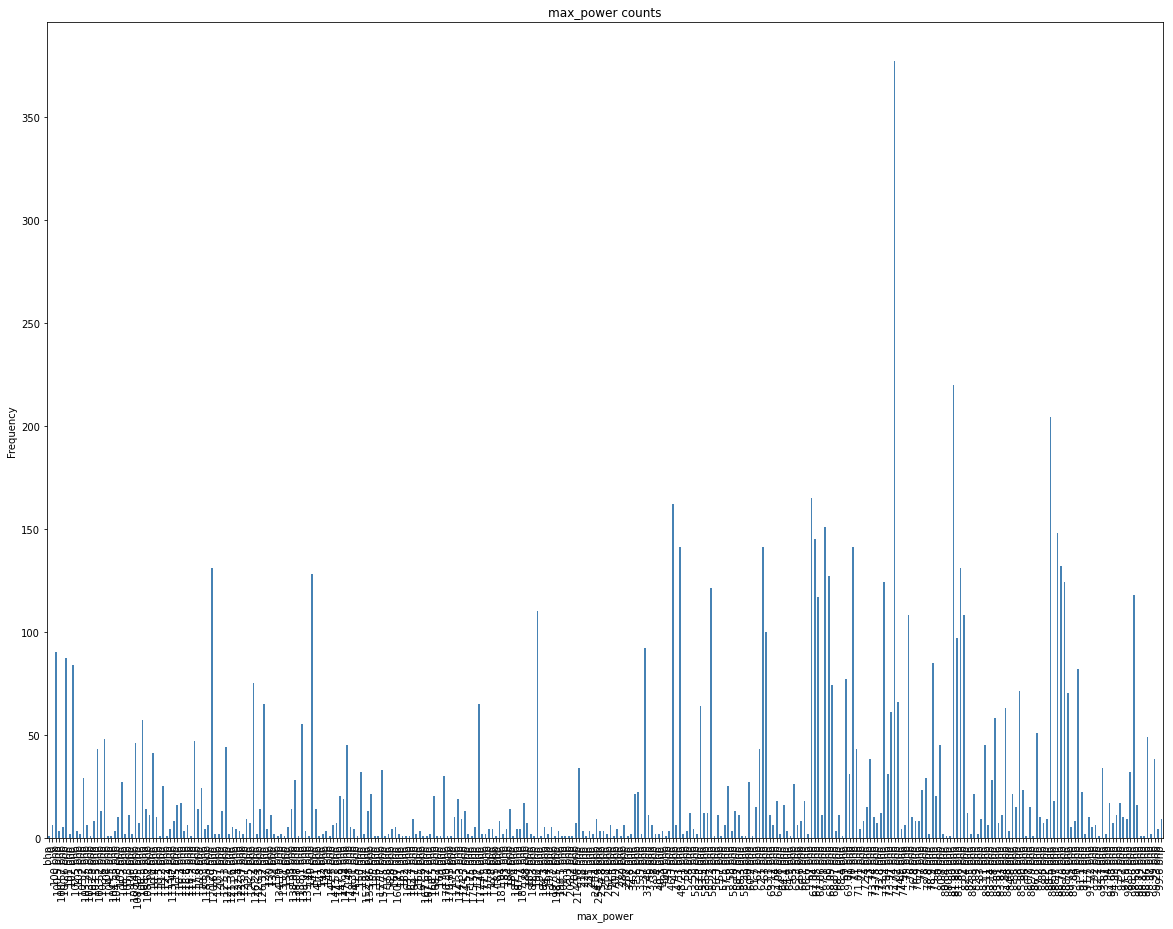

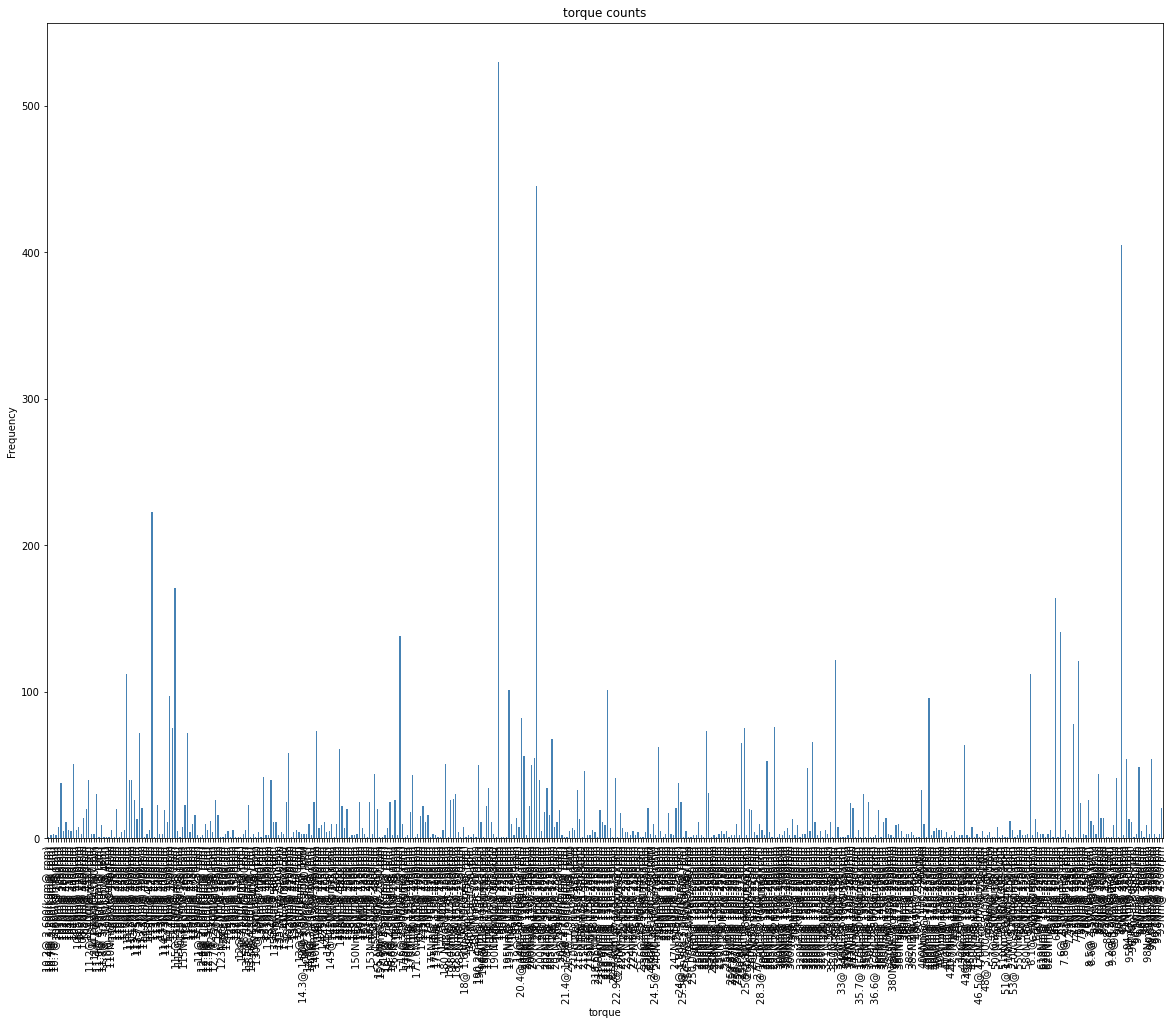

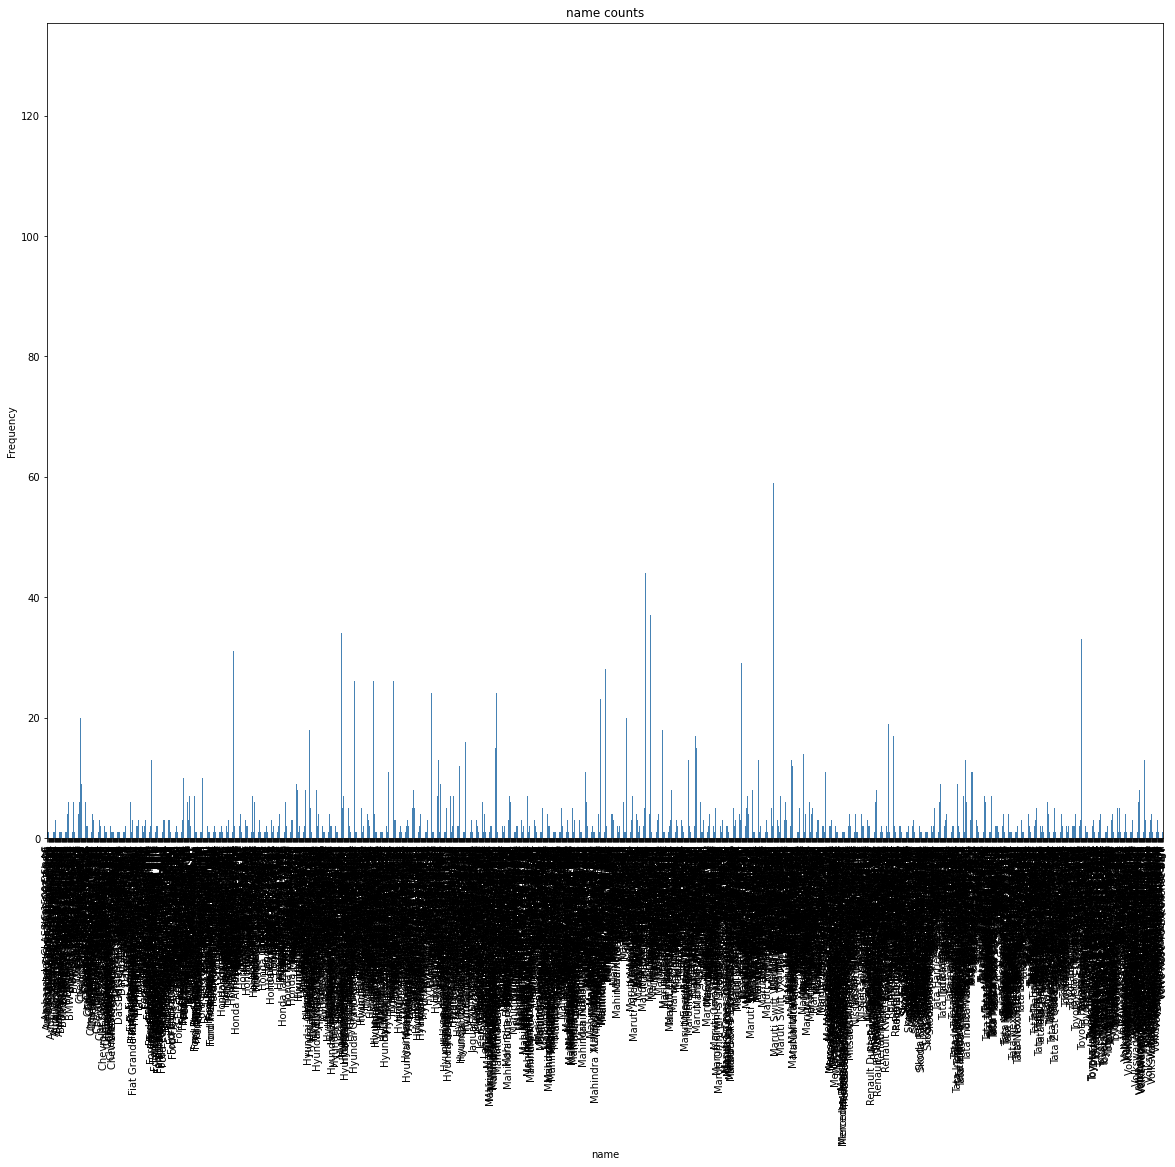

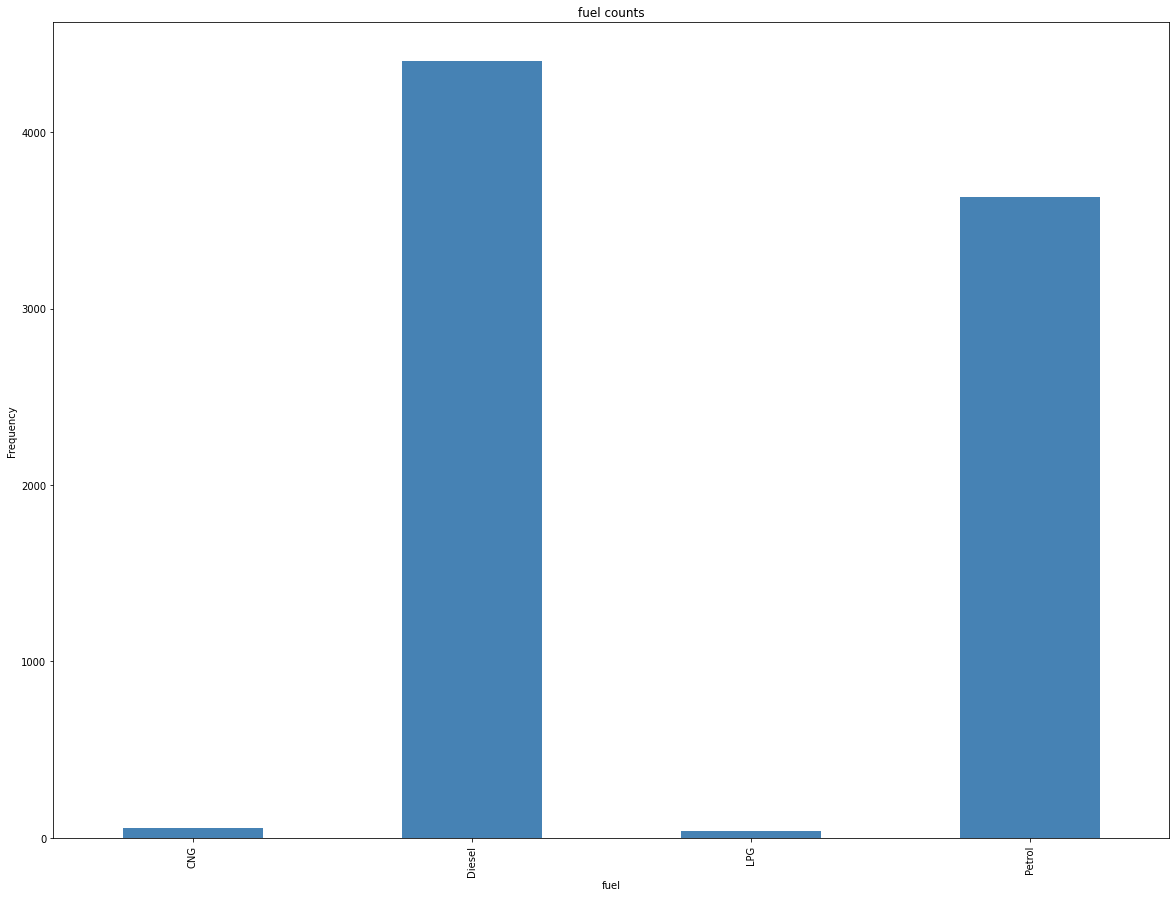

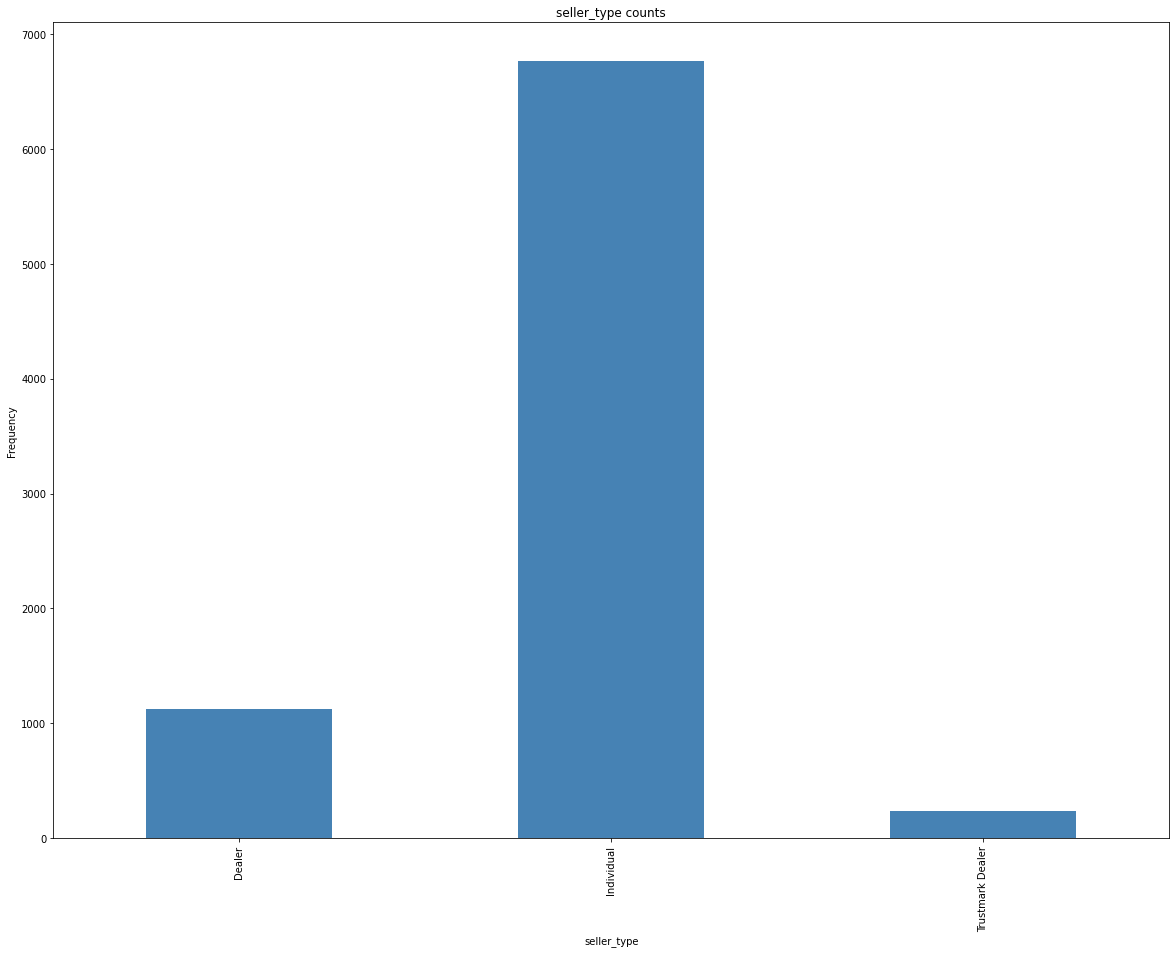

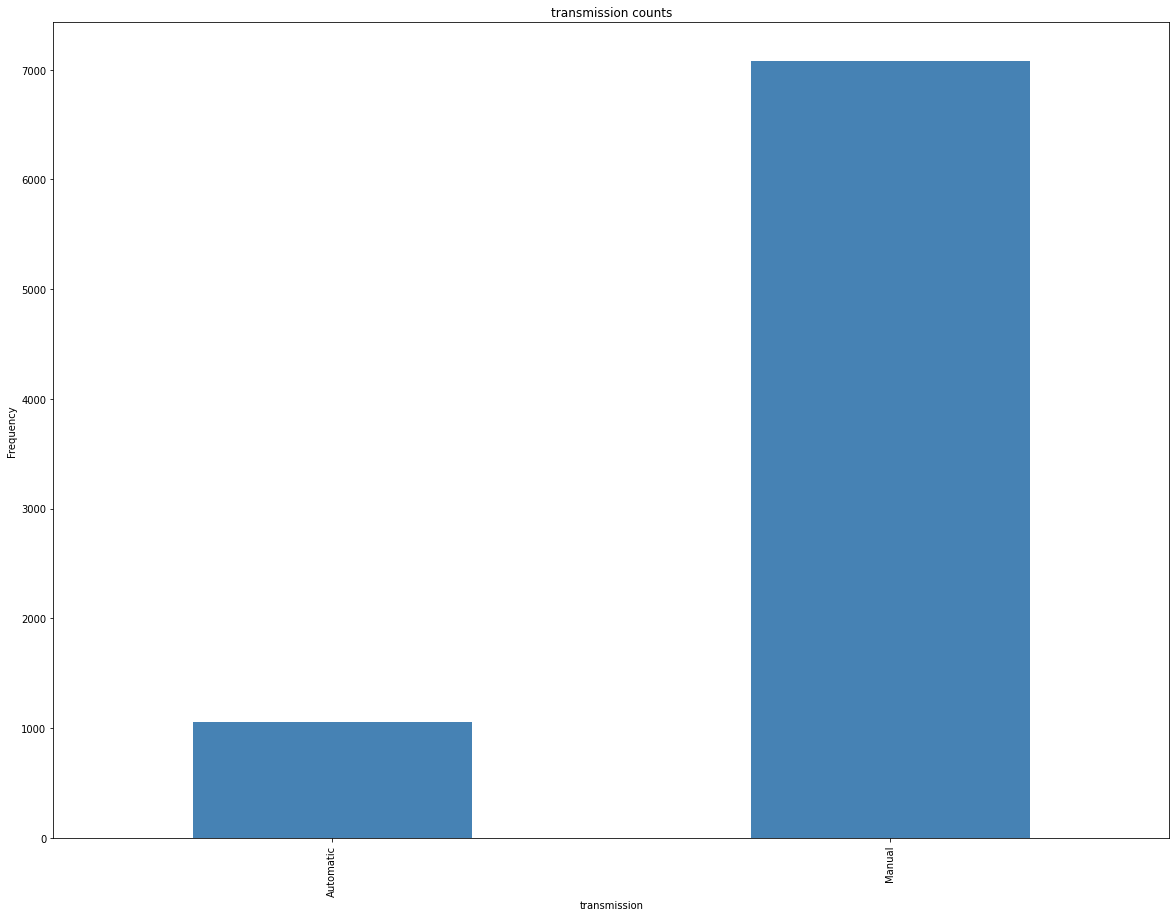

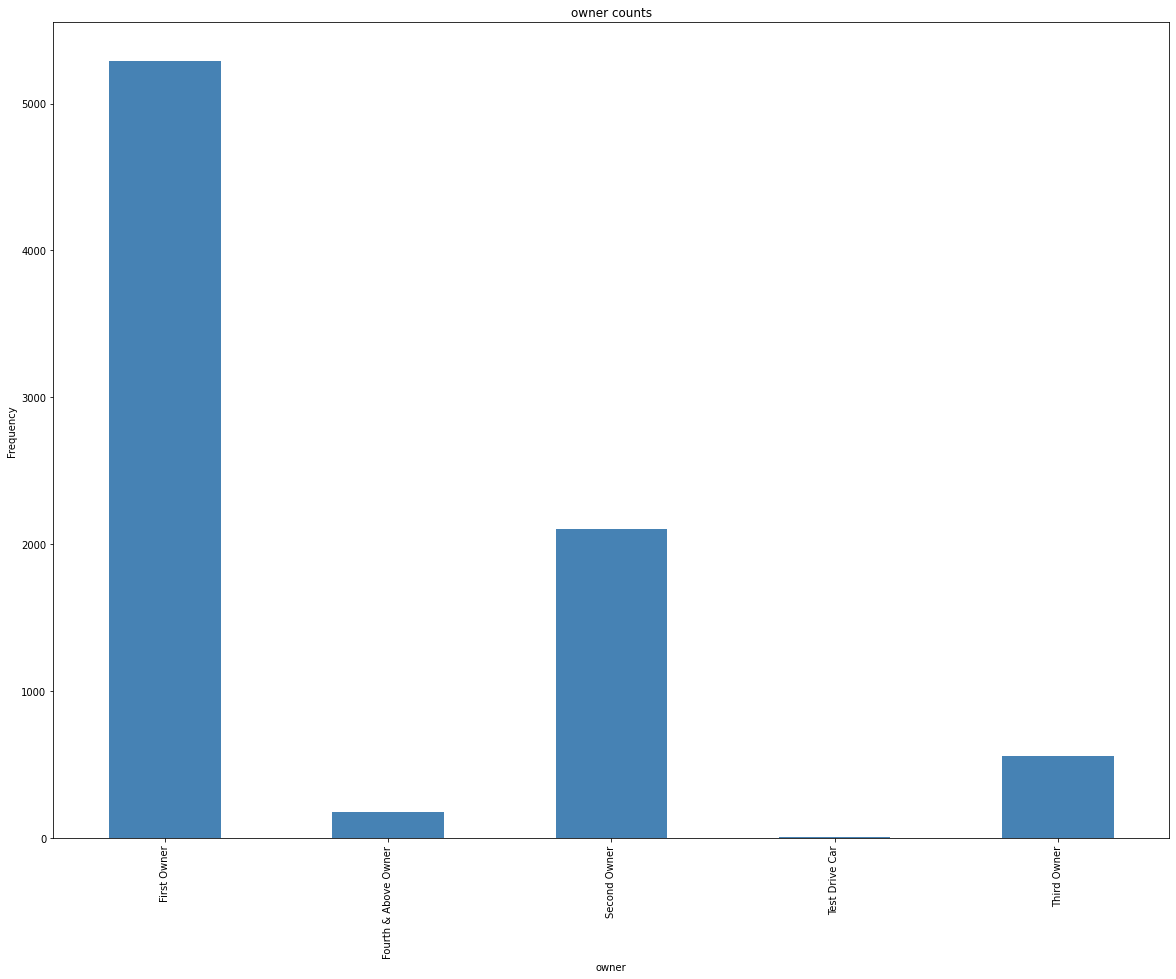

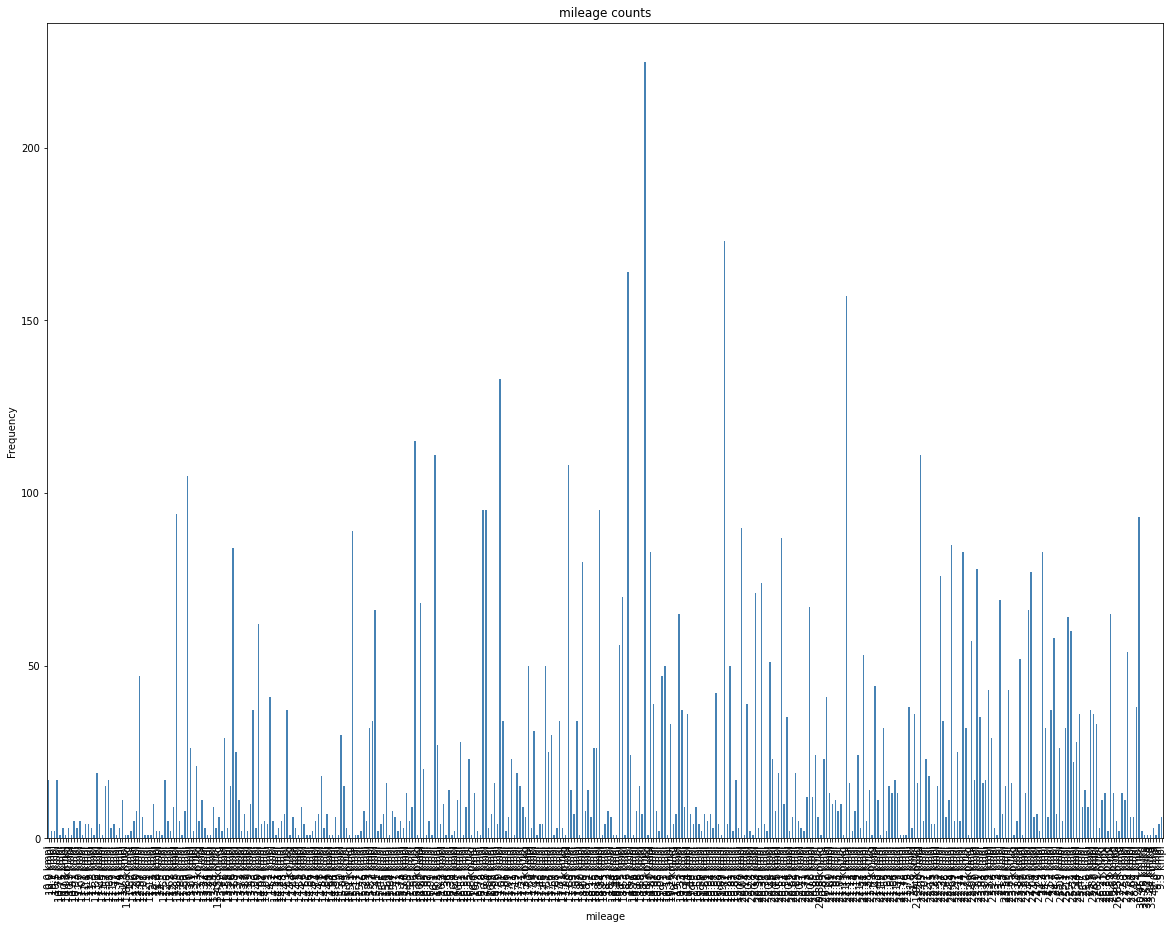

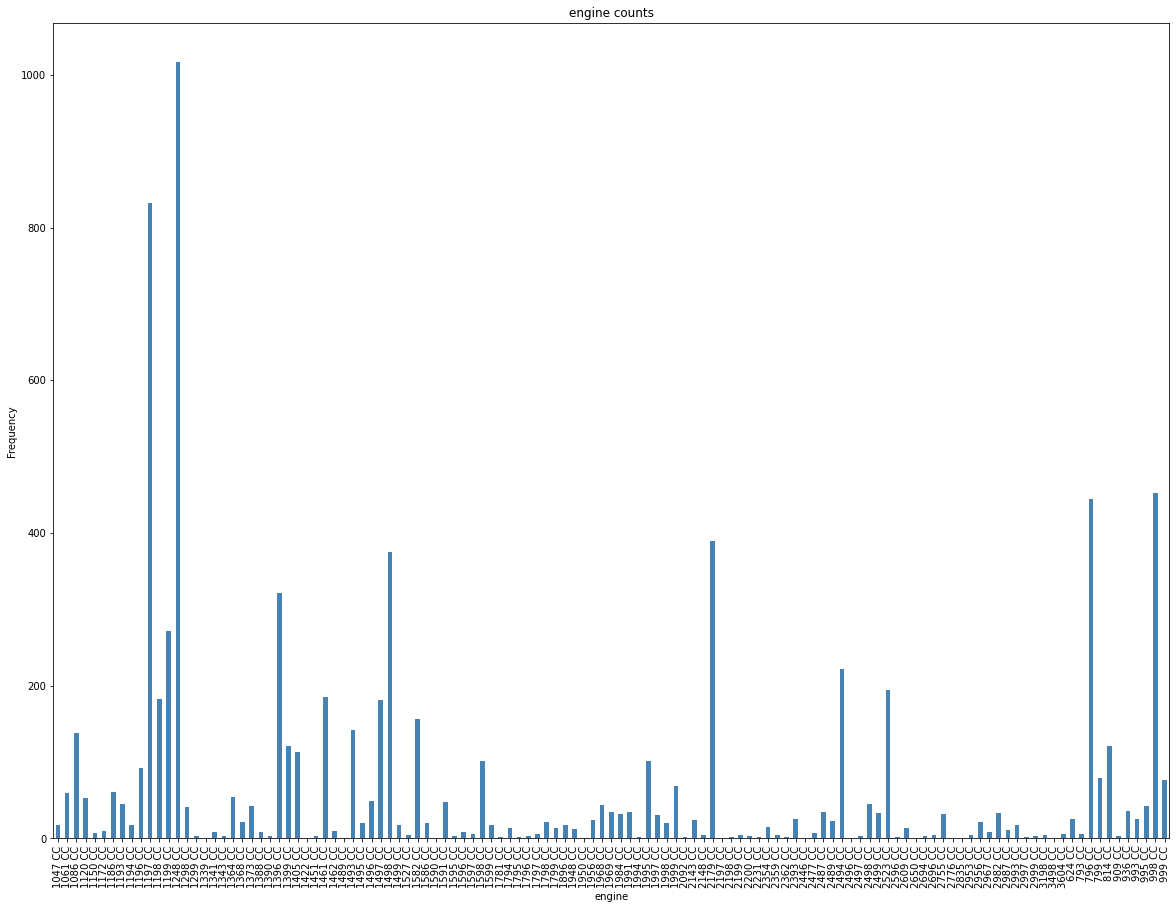

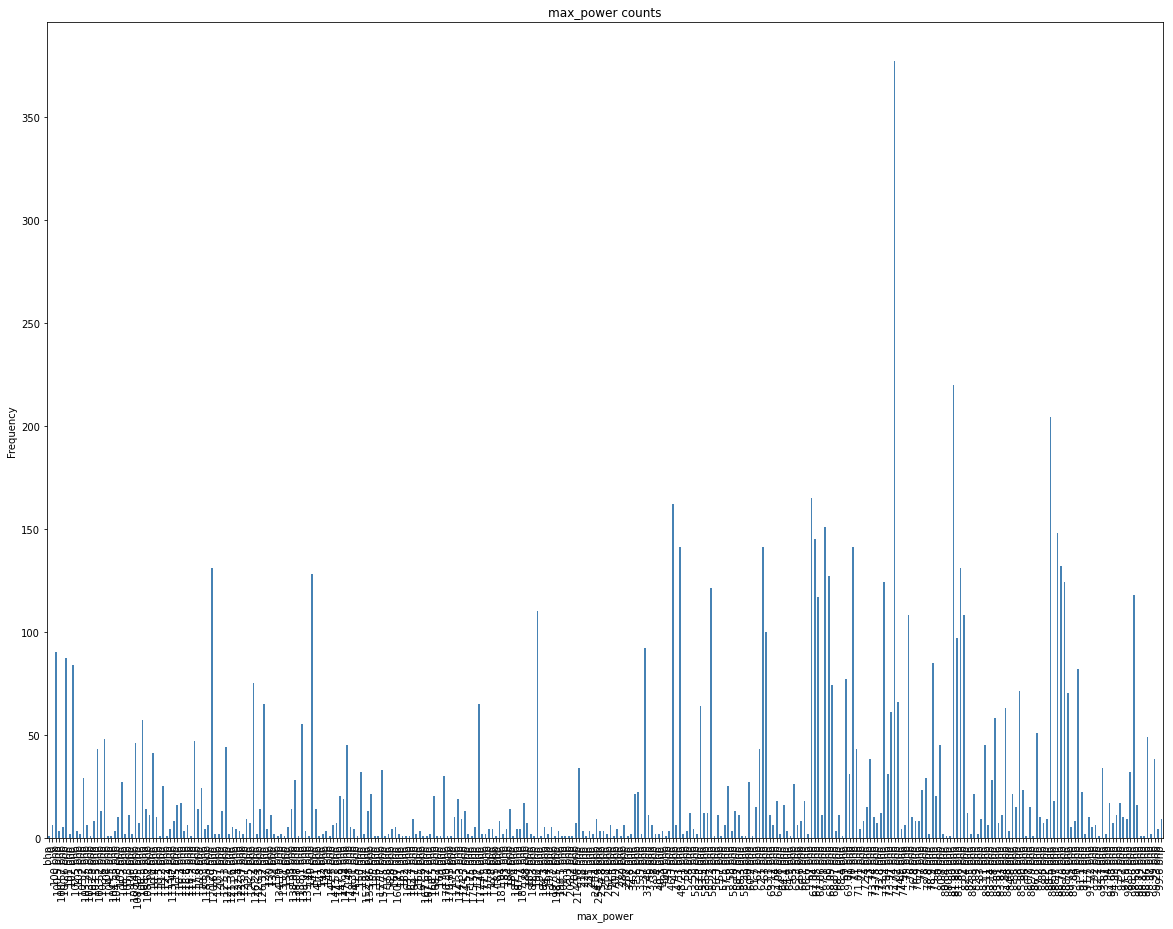

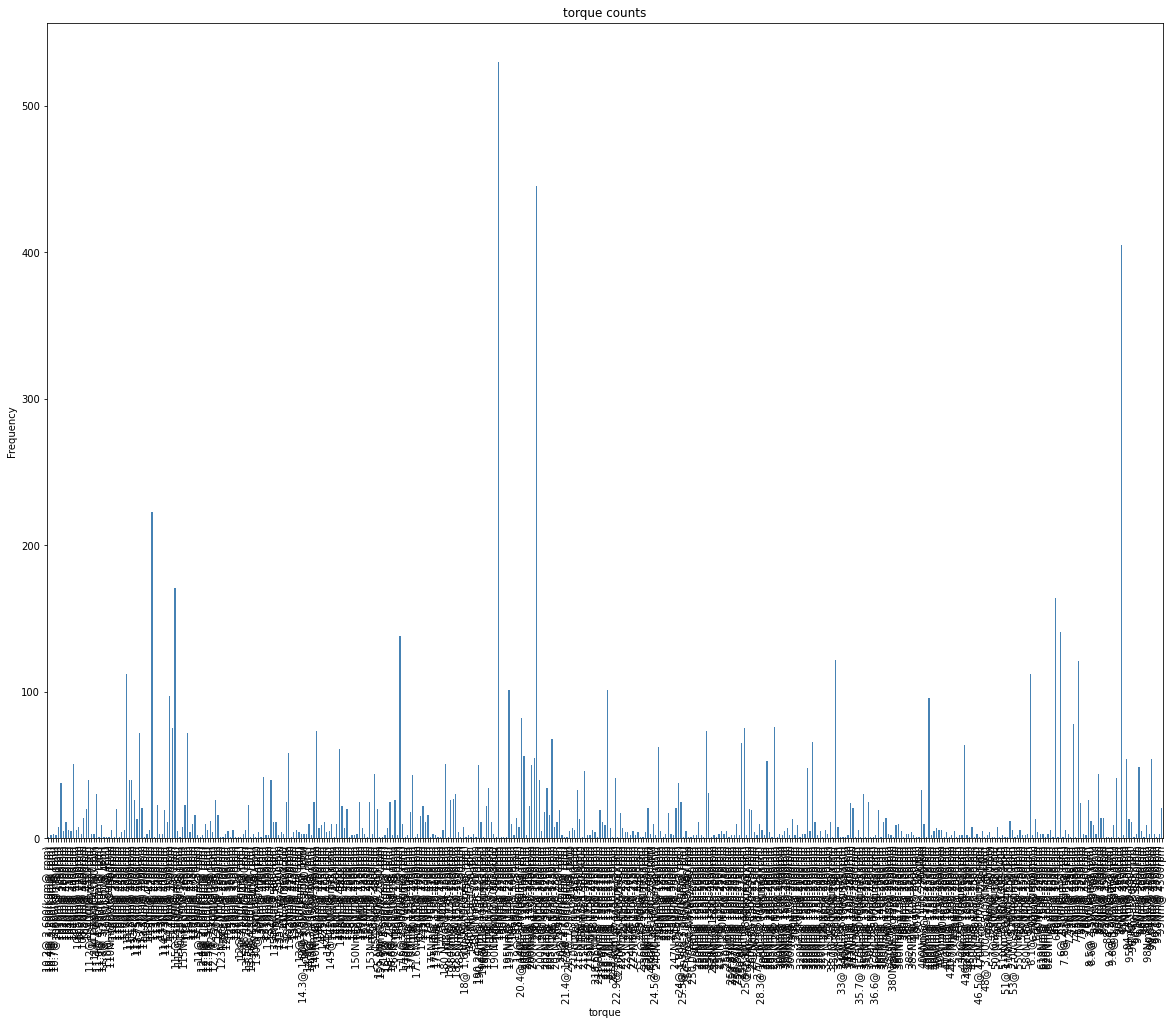

In [23]:
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']
for col in categorical_features:
    counts1 = df3[col].value_counts().sort_index()
    fig = plt.figure(figsize=(20, 15))
    ax = fig.gca()
    counts1.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
    plt.show()

### Let's first explore df1 furthure:


In [29]:
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project2:Supervised_Learning/Car dekho dataset/car_data.csv')
numerical_features = list(df1.describe().columns)

categorical_features = []
for col in df1.columns:
    if col not in numerical_features:
        categorical_features.append(col)
print(categorical_features)    

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [30]:
# Searching Unique values(categorical features)
for elem in categorical_features:
    print(elem)
    print(df1[elem].unique())

Car_Name
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'He

In [31]:
# Checking for missing values
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [32]:
df1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [33]:
df1.Year

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

In [34]:
from datetime import date

In [35]:
today = date.today()
today

datetime.date(2022, 5, 24)

In [36]:
today.year

2022

In [37]:
df1['Current_Year'] = today.year

In [39]:
df1['Car_Age'] = df1['Current_Year'] - df1['Year']

In [40]:
df1.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Current_Year',
       'Car_Age'],
      dtype='object')

In [41]:
final_dataset = df1[['Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
       'Car_Age']]

In [42]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [43]:
# Processing the categorical data
final_dataset = pd.get_dummies(final_dataset,drop_first=True) # drop_first is used because if two subcategories are 0, then third one will already exist.

In [44]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,1,0,0,1
297,4.00,5.90,60000,0,7,0,1,0,1
298,3.35,11.00,87934,0,13,0,1,0,1
299,11.50,12.50,9000,0,5,1,0,0,1


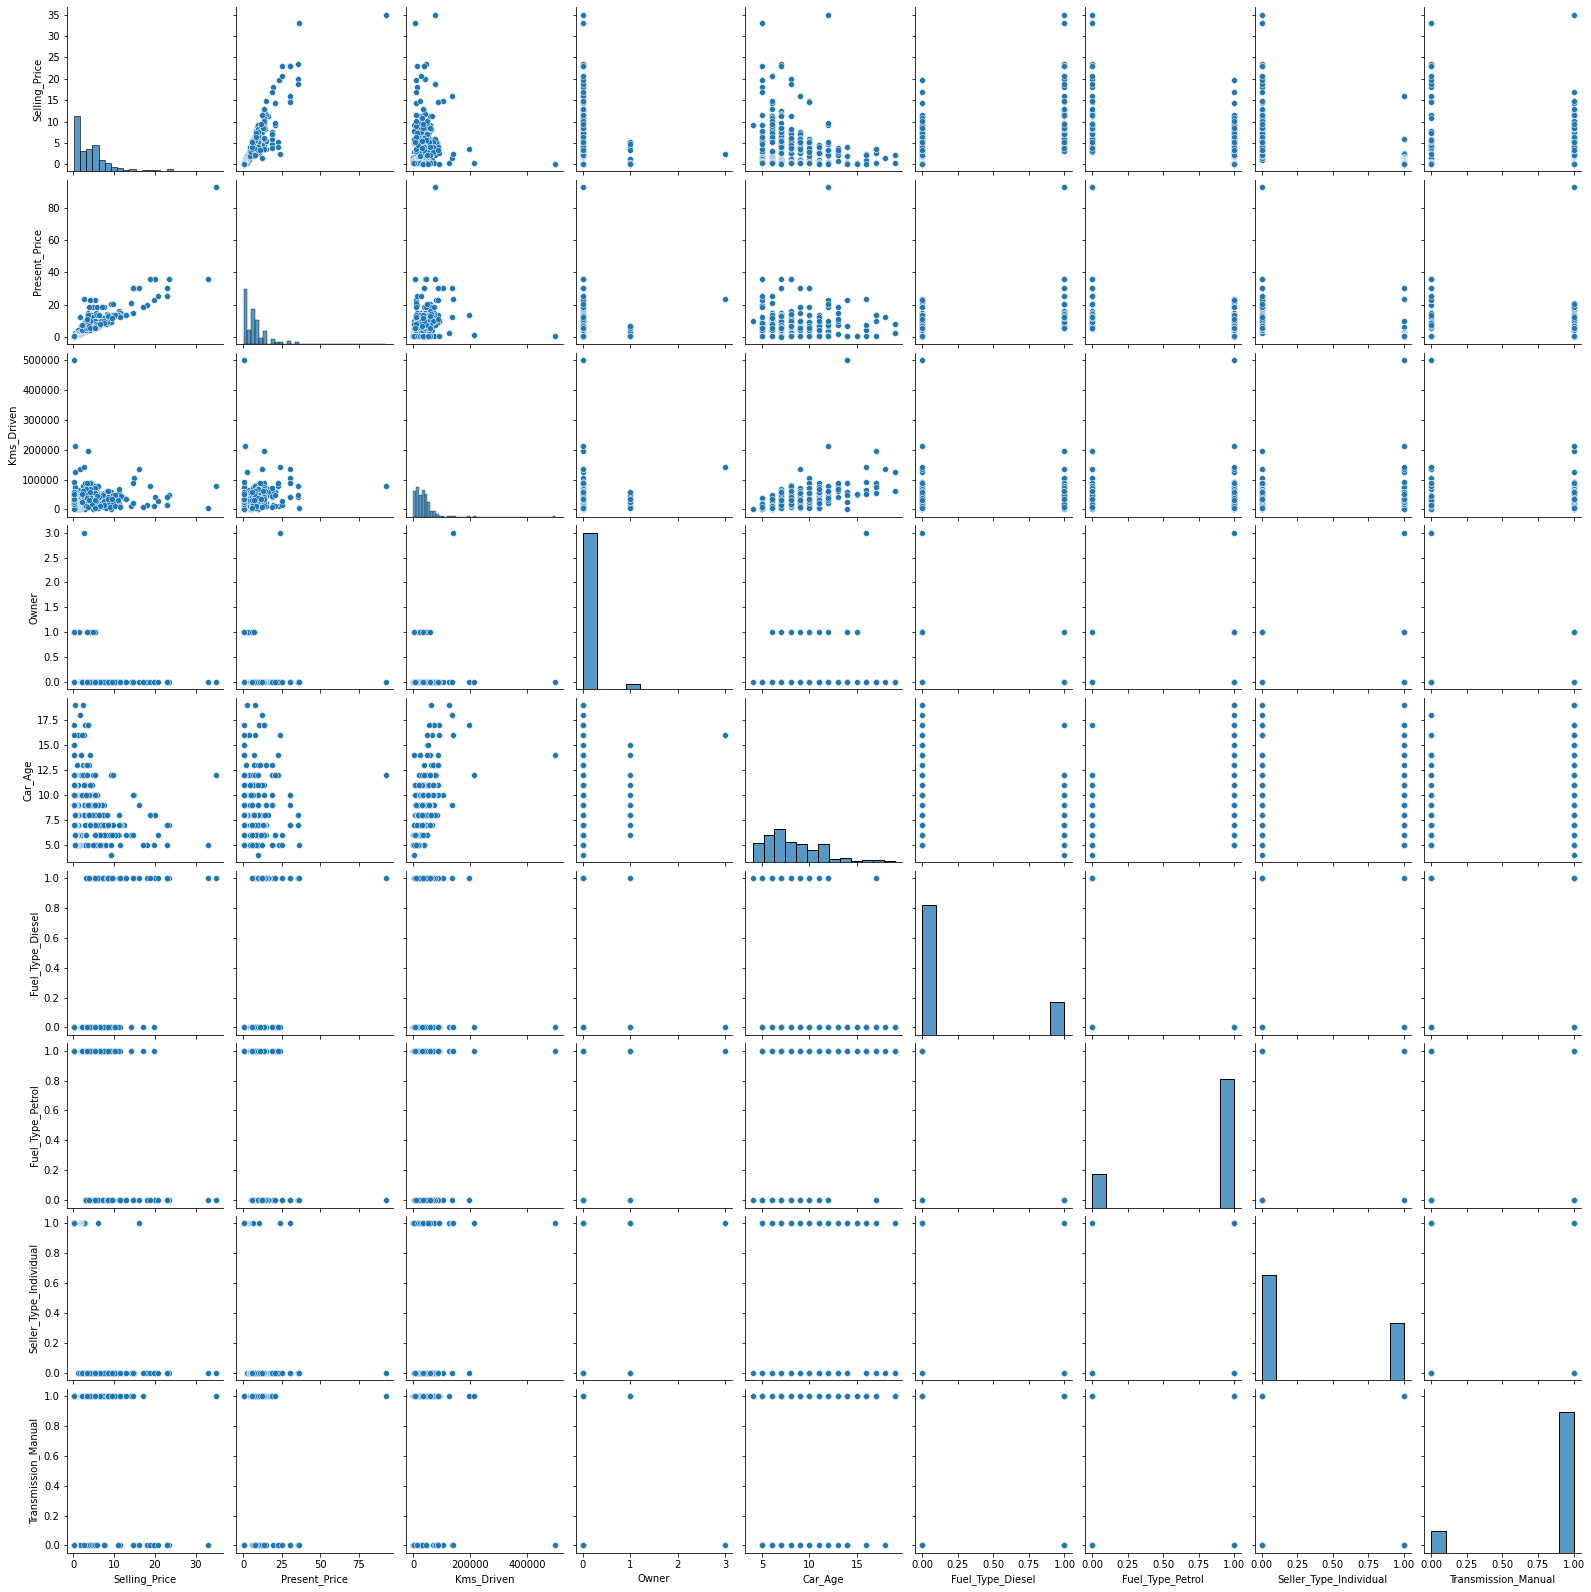

In [45]:
sb.pairplot(final_dataset)

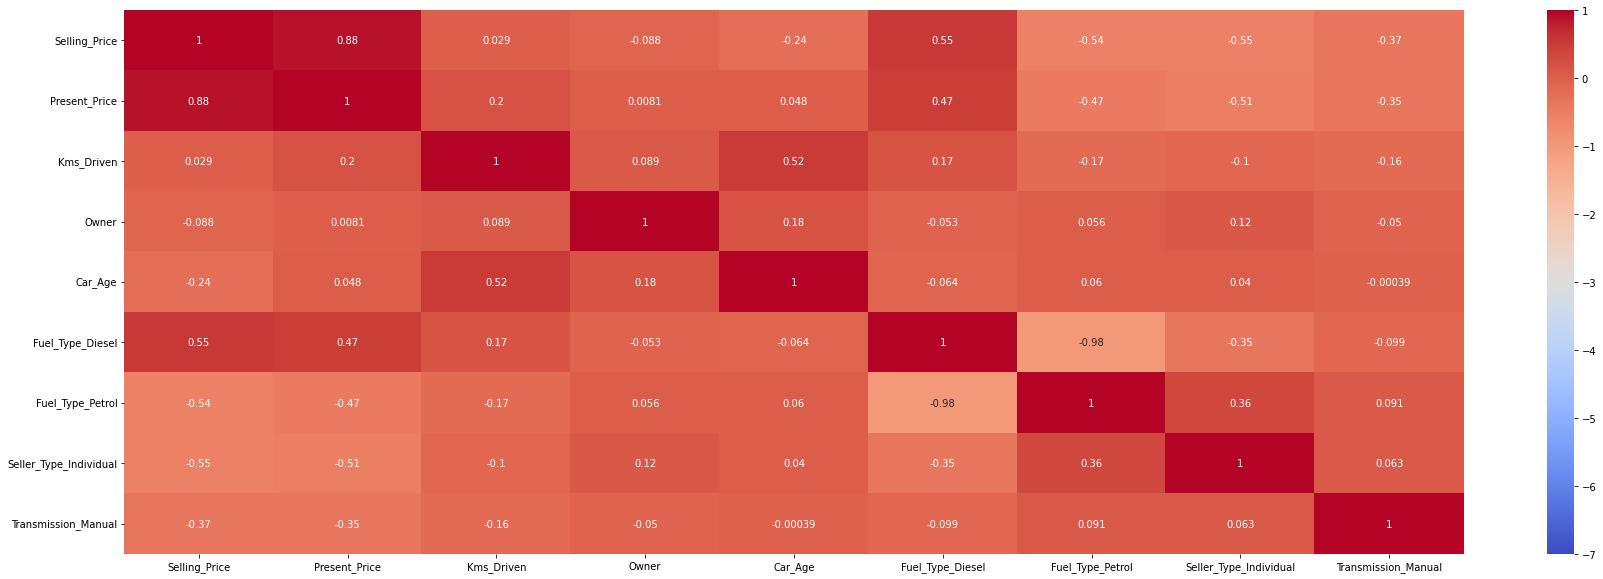

In [46]:
sb.heatmap(final_dataset.corr(), vmin=-7, cmap='coolwarm', annot=True)